In [1]:
import math
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import re
import seaborn as sns
import pandas as pd
import random
from scipy import stats  #t-test
import semopy
import pandas as pd
from semopy import Model
import scipy.stats as stats 
from itertools import groupby
import statsmodels.formula.api as smf
import statsmodels.api as sm

C:\Users\ljr\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
pathturn11 = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\block\fa\turn1"
filesturn11= os.listdir(pathturn11)
pathturn12 = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\block\fa\turn2"
filesturn12= os.listdir(pathturn12)
pathturn13 = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\block\fa\turn3"
filesturn13= os.listdir(pathturn13)
pathturn14 = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\block\fa\turn4"
filesturn14= os.listdir(pathturn14)
pathturn15 = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\block\fa\turn5"
filesturn15= os.listdir(pathturn15)

pathturn11c = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\block\chi\turn1"
filesturn11c= os.listdir(pathturn11c)
pathturn12c = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\block\chi\turn2"
filesturn12c= os.listdir(pathturn12c)
pathturn13c = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\block\chi\turn3"
filesturn13c= os.listdir(pathturn13c)
pathturn14c = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\block\chi\turn4"
filesturn14c= os.listdir(pathturn14c)
pathturn15c = r"C:\LJR\babylab\marisa\datamanual\cut\0643\turntaking\block\chi\turn5"
filesturn15c= os.listdir(pathturn15c)

In [3]:
print(len(filesturn11)*len(filesturn11c),filesturn11[0],filesturn11c[0],filesturn11[-1],filesturn11c[-1])
print(len(filesturn12)*len(filesturn12c),filesturn12[0],filesturn12c[0],filesturn12[-1],filesturn12c[-1])
print(len(filesturn13)*len(filesturn13c),filesturn13[0],filesturn13c[0],filesturn13[-1],filesturn13c[-1])
print(len(filesturn14)*len(filesturn14c),filesturn14[0],filesturn14c[0],filesturn14[-1],filesturn14c[-1])
print(len(filesturn15)*len(filesturn15c),filesturn15[0],filesturn15c[0],filesturn15[-1],filesturn15c[-1])

80 T11126.686.wav 11131.021.wav T11146.075.wav 11145.267.wav
6 T11295.51.wav 11298.798.wav T11304.991.wav 11304.019.wav
2 C11397.629.wav 11395.831.wav C11397.629.wav 11398.945.wav
12 T11467.47.wav 11465.945.wav T11474.978.wav 11472.993.wav
2 T11191.333.wav 11190.401.wav T11191.333.wav 11191.637.wav


In [4]:
pathturn21 = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\fa\turn1"
filesturn21= os.listdir(pathturn21)
pathturn22 = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\fa\turn2"
filesturn22= os.listdir(pathturn22)
pathturn23 = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\fa\turn3"
filesturn23= os.listdir(pathturn23)
pathturn24 = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\fa\turn4"
filesturn24= os.listdir(pathturn24)
pathturn25 = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\fa\turn5"
filesturn25= os.listdir(pathturn25)
pathturn26 = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\fa\turn6"
filesturn26= os.listdir(pathturn26)

pathturn21c = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\chi\turn1"
filesturn21c= os.listdir(pathturn21c)
pathturn22c = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\chi\turn2"
filesturn22c= os.listdir(pathturn22c)
pathturn23c = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\chi\turn3"
filesturn23c= os.listdir(pathturn23c)
pathturn24c = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\chi\turn4"
filesturn24c= os.listdir(pathturn24c)
pathturn25c = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\chi\turn5"
filesturn25c= os.listdir(pathturn25c)
pathturn26c = r"C:\LJR\babylab\marisa\datamanual\cut\2109\turntaking\block\chi\turn6"
filesturn26c= os.listdir(pathturn26c)

In [5]:
print(len(filesturn21)*len(filesturn21c),filesturn21[0],filesturn21c[0],filesturn21[-1],filesturn21c[-1])
print(len(filesturn22)*len(filesturn22c),filesturn22[0],filesturn22c[0],filesturn22[-1],filesturn22c[-1])
print(len(filesturn23)*len(filesturn23c),filesturn23[0],filesturn23c[0],filesturn23[-1],filesturn23c[-1])
print(len(filesturn24)*len(filesturn24c),filesturn24[0],filesturn24c[0],filesturn24[-1],filesturn24c[-1])
print(len(filesturn25)*len(filesturn25c),filesturn25[0],filesturn25c[0],filesturn25[-1],filesturn25c[-1])
print(len(filesturn26)*len(filesturn26c),filesturn26[0],filesturn26c[0],filesturn26[-1],filesturn26c[-1])

2 T4139.8289375.wav 4140.175.wav T4140.732.wav 4140.175.wav
12 T4340.306.wav 4344.251.wav T4350.981.wav 4345.008.wav
4 T4357.296.wav 4360.24.wav T4362.611.wav 4361.664.wav
2 T22800.424.wav 22800.9.wav T22801.716.wav 22800.9.wav
6 T29305.964.wav 29309.888.wav T29311.344.wav 29310.768.wav
2 T31721.091.wav 31720.416.wav T31721.091.wav 31721.602.wav


In [6]:
pathturn31 = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\block\fa\turn1"
filesturn31= os.listdir(pathturn31)
pathturn32 = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\block\fa\turn2"# outlier
filesturn32= os.listdir(pathturn32)
pathturn33 = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\block\fa\turn3"
filesturn33= os.listdir(pathturn33)
pathturn34 = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\block\fa\turn4"
filesturn34= os.listdir(pathturn34)
pathturn35 = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\block\fa\turn5"
filesturn35= os.listdir(pathturn35)
pathturn36 = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\block\fa\turn6"
filesturn36= os.listdir(pathturn36)
pathturn37 = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\block\fa\turn7"
filesturn37= os.listdir(pathturn37)
pathturn38 = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\block\fa\turn8"
filesturn38= os.listdir(pathturn38)
pathturn39 = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\block\fa\turn9"
filesturn39= os.listdir(pathturn39)
pathturn310 = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\block\fa\turn10"
filesturn310= os.listdir(pathturn310)


pathturn31c = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\block\chi\turn1"
filesturn31c= os.listdir(pathturn31c)
pathturn32c = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\block\chi\turn2"# outlier
filesturn32c= os.listdir(pathturn32c)
pathturn33c = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\block\chi\turn3"
filesturn33c= os.listdir(pathturn33c)
pathturn34c = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\block\chi\turn4"
filesturn34c= os.listdir(pathturn34c)
pathturn35c = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\block\chi\turn5"
filesturn35c= os.listdir(pathturn35c)
pathturn36c = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\block\chi\turn6"
filesturn36c= os.listdir(pathturn36c)
pathturn37c = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\block\chi\turn7"
filesturn37c= os.listdir(pathturn37c)
pathturn38c = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\block\chi\turn8"
filesturn38c= os.listdir(pathturn38c)
pathturn39c = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\block\chi\turn9"
filesturn39c= os.listdir(pathturn39c)
pathturn310c = r"C:\LJR\babylab\marisa\datamanual\cut\2625\turntaking\block\chi\turn10"
filesturn310c= os.listdir(pathturn310c)


In [7]:
print(len(filesturn31)*len(filesturn31c),filesturn31[0],filesturn31c[0],filesturn31[-1],filesturn31c[-1])
print(len(filesturn32)*len(filesturn32c),filesturn32[0],filesturn32c[0],filesturn32[-1],filesturn32c[-1])
print(len(filesturn33)*len(filesturn33c),filesturn33[0],filesturn33c[0],filesturn33[-1],filesturn33c[-1])
print(len(filesturn34)*len(filesturn34c),filesturn34[0],filesturn34c[0],filesturn34[-1],filesturn34c[-1])
print(len(filesturn35)*len(filesturn35c),filesturn35[0],filesturn35c[0],filesturn35[-1],filesturn35c[-1])
print(len(filesturn36)*len(filesturn36c),filesturn36[0],filesturn36c[0],filesturn36[-1],filesturn36c[-1])
print(len(filesturn37)*len(filesturn37c),filesturn37[0],filesturn37c[0],filesturn37[-1],filesturn37c[-1])
print(len(filesturn38)*len(filesturn38c),filesturn38[0],filesturn38c[0],filesturn38[-1],filesturn38c[-1])
print(len(filesturn39)*len(filesturn39c),filesturn39[0],filesturn39c[0],filesturn39[-1],filesturn39c[-1])
print(len(filesturn310)*len(filesturn310c),filesturn310[0],filesturn310c[0],filesturn310[-1],filesturn310c[-1])

16 T2732.315.wav 2729.138.wav T2740.067.wav 2742.196.wav
650 T10000.337.wav 10001.195.wav T9998.731.wav 9999.038.wav
9 T12270.619.wav 12272.316.wav T12275.854.wav 12278.055.wav
6 T12317.516.wav 12315.203.wav T12319.671.wav 12322.176.wav
16 T12934.345.wav 12931.507.wav T12942.981.wav 12944.092.wav
2 T16510.077.wav 16508.072.wav T16510.077.wav 16511.629.wav
2 T16659.273.wav 16658.1719375.wav T16659.273.wav 16660.9399375.wav
3 T18565.578.wav 18563.634.wav T18565.578.wav 18566.474.wav
2 T32758.515.wav 32757.318.wav T32758.515.wav 32759.735.wav
30 T33172.87.wav 33154.4479375.wav T33175.175.wav 33182.994.wav


In [8]:
pathturn41 = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\fa\turn1"
filesturn41= os.listdir(pathturn41)
pathturn42 = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\fa\turn2"
filesturn42= os.listdir(pathturn42)
pathturn43 = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\fa\turn3"
filesturn43= os.listdir(pathturn43)
pathturn44 = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\fa\turn4"
filesturn44= os.listdir(pathturn44)
pathturn45 = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\fa\turn5"
filesturn45= os.listdir(pathturn45)
pathturn46 = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\fa\turn6"
filesturn46= os.listdir(pathturn46)
pathturn47 = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\fa\turn7"
filesturn47= os.listdir(pathturn47)
pathturn48 = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\fa\turn8"
filesturn48= os.listdir(pathturn48)
pathturn49 = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\fa\turn9"
filesturn49= os.listdir(pathturn49)
pathturn410 = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\fa\turn10"
filesturn410= os.listdir(pathturn410)
pathturn411 = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\fa\turn11"
filesturn411= os.listdir(pathturn411)
pathturn412 = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\fa\turn12"
filesturn412= os.listdir(pathturn412)
pathturn413 = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\fa\turn13"
filesturn413= os.listdir(pathturn413)
pathturn414 = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\fa\turn14"
filesturn414= os.listdir(pathturn414)

pathturn41c = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\chi\turn1"
filesturn41c= os.listdir(pathturn41c)
pathturn42c = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\chi\turn2"
filesturn42c= os.listdir(pathturn42c)
pathturn43c = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\chi\turn3"
filesturn43c= os.listdir(pathturn43c)
pathturn44c = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\chi\turn4"
filesturn44c= os.listdir(pathturn44c)
pathturn45c = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\chi\turn5"
filesturn45c= os.listdir(pathturn45c)
pathturn46c = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\chi\turn6"
filesturn46c= os.listdir(pathturn46c)
pathturn47c = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\chi\turn7"
filesturn47c= os.listdir(pathturn47c)
pathturn48c = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\chi\turn8"
filesturn48c= os.listdir(pathturn48c)
pathturn49c = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\chi\turn9"
filesturn49c= os.listdir(pathturn49c)
pathturn410c = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\chi\turn10"
filesturn410c= os.listdir(pathturn410c)
pathturn411c = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\chi\turn11"
filesturn411c= os.listdir(pathturn411c)
pathturn412c = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\chi\turn12"
filesturn412c= os.listdir(pathturn412c)
pathturn413c = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\chi\turn13"
filesturn413c= os.listdir(pathturn413c)
pathturn414c = r"C:\LJR\babylab\marisa\datamanual\cut\3026\turntaking\block\chi\turn14"
filesturn414c= os.listdir(pathturn414c)

In [9]:
print(len(filesturn41)*len(filesturn41c),filesturn41[0],filesturn41c[0],filesturn41[-1],filesturn41c[-1])
print(len(filesturn42)*len(filesturn42c),filesturn42[0],filesturn42c[0],filesturn42[-1],filesturn42c[-1])
print(len(filesturn43)*len(filesturn43c),filesturn43[0],filesturn43c[0],filesturn43[-1],filesturn43c[-1])
print(len(filesturn44)*len(filesturn44c),filesturn44[0],filesturn44c[0],filesturn44[-1],filesturn44c[-1])
print(len(filesturn45)*len(filesturn45c),filesturn45[0],filesturn45c[0],filesturn45[-1],filesturn45c[-1])
print(len(filesturn46)*len(filesturn46c),filesturn46[0],filesturn46c[0],filesturn46[-1],filesturn46c[-1])
print(len(filesturn47)*len(filesturn47c),filesturn47[0],filesturn47c[0],filesturn47[-1],filesturn47c[-1])
print(len(filesturn48)*len(filesturn48c),filesturn48[0],filesturn48c[0],filesturn48[-1],filesturn48c[-1])
print(len(filesturn49)*len(filesturn49c),filesturn49[0],filesturn49c[0],filesturn49[-1],filesturn49c[-1])
print(len(filesturn410)*len(filesturn410c),filesturn410[0],filesturn410c[0],filesturn410[-1],filesturn410c[-1])
print(len(filesturn411)*len(filesturn411c),filesturn411[0],filesturn411c[0],filesturn411[-1],filesturn411c[-1])
print(len(filesturn412)*len(filesturn412c),filesturn412[0],filesturn412c[0],filesturn412[-1],filesturn412c[-1])
print(len(filesturn413)*len(filesturn413c),filesturn413[0],filesturn413c[0],filesturn413[-1],filesturn413c[-1])
print(len(filesturn414)*len(filesturn414c),filesturn414[0],filesturn414c[0],filesturn414[-1],filesturn414c[-1])

4 T1715.81.wav 1713.813.wav T1718.6.wav 1716.796.wav
2 T1841.662.wav 1842.17.wav T1843.708.wav 1842.17.wav
6 T2279.67.wav 2277.799.wav T2284.01.wav 2282.485.wav
4 T5749.13.wav 5746.353.wav T5752.085.wav 5751.152.wav
28 T5827.344.wav 5829.695.wav T5844.187.wav 5844.871.wav
3 T8945.386.wav 8942.545.wav T8945.386.wav 8946.575.wav
6 T9049.886.wav 9048.729.wav T9056.132.wav 9056.969.wav
4 T9128.165.wav 9130.013.wav T9130.74.wav 9131.992.wav
6 T13564.02.wav 13562.92.wav T13576.03.wav 13567.743.wav
20 T13581.395.wav 13576.878.wav T13589.235.wav 13587.393.wav
4 T17071.32.wav 17070.066.wav T17073.68.wav 17074.702.wav
4 T17121.665.wav 17120.402.wav T17123.755.wav 17122.5.wav
4 T17174.13.wav 17174.99.wav T17176.96.wav 17177.89.wav
16 T29396.727.wav 29394.792.wav T29406.525.wav 29405.004.wav


In [10]:
pathturn51 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn1"
filesturn51= os.listdir(pathturn51)
pathturn52 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn2"
filesturn52= os.listdir(pathturn52)
pathturn53 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn3"# outlier
filesturn53= os.listdir(pathturn53)
pathturn54 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn4"
filesturn54= os.listdir(pathturn54)
pathturn55 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn5"
filesturn55= os.listdir(pathturn55)
pathturn56 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn6"
filesturn56= os.listdir(pathturn56)
pathturn57 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn7"
filesturn57= os.listdir(pathturn57)
pathturn58 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn8"
filesturn58= os.listdir(pathturn58)
pathturn59 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn9"
filesturn59= os.listdir(pathturn59)
pathturn510 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn10"
filesturn510= os.listdir(pathturn510)


pathturn51c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn1"
filesturn51c= os.listdir(pathturn51c)
pathturn52c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn2"
filesturn52c= os.listdir(pathturn52c)
pathturn53c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn3"
filesturn53c= os.listdir(pathturn53c)
pathturn54c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn4"
filesturn54c= os.listdir(pathturn54c)
pathturn55c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn5"
filesturn55c= os.listdir(pathturn55c)
pathturn56c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn6"
filesturn56c= os.listdir(pathturn56c)
pathturn57c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn7"
filesturn57c= os.listdir(pathturn57c)
pathturn58c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn8"
filesturn58c= os.listdir(pathturn58c)
pathturn59c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn9"
filesturn59c= os.listdir(pathturn59c)
pathturn510c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn10"
filesturn510c= os.listdir(pathturn510c)


In [11]:
print(len(filesturn51)*len(filesturn51c),filesturn51[0],filesturn51c[0],filesturn51[-1],filesturn51c[-1])
print(len(filesturn52)*len(filesturn52c),filesturn52[0],filesturn52c[0],filesturn52[-1],filesturn52c[-1])
print(len(filesturn53)*len(filesturn53c),filesturn53[0],filesturn53c[0],filesturn53[-1],filesturn53c[-1])
print(len(filesturn54)*len(filesturn54c),filesturn54[0],filesturn54c[0],filesturn54[-1],filesturn54c[-1])
print(len(filesturn55)*len(filesturn55c),filesturn55[0],filesturn55c[0],filesturn55[-1],filesturn55c[-1])
print(len(filesturn56)*len(filesturn56c),filesturn56[0],filesturn56c[0],filesturn56[-1],filesturn56c[-1])
print(len(filesturn57)*len(filesturn57c),filesturn57[0],filesturn57c[0],filesturn57[-1],filesturn57c[-1])
print(len(filesturn58)*len(filesturn58c),filesturn58[0],filesturn58c[0],filesturn58[-1],filesturn58c[-1])
print(len(filesturn59)*len(filesturn59c),filesturn59[0],filesturn59c[0],filesturn59[-1],filesturn59c[-1])
print(len(filesturn510)*len(filesturn510c),filesturn510[0],filesturn510c[0],filesturn510[-1],filesturn510c[-1])

12 T883.38.wav 882.445.wav T896.41.wav 895.16.wav
9 T921.07.wav 919.545.wav T924.175.wav 925.67.wav
6 T1739.507.wav 1736.565.wav T1742.995.wav 1740.224.wav
6 T1753.299.wav 1750.629.wav T1755.712.wav 1759.055.wav
6 T1767.059.wav 1768.915.wav T1770.225.wav 1773.507.wav
24 T1848.015.wav 1845.037.wav T1859.348.wav 1862.781.wav
9 T3363.116.wav 3367.113.wav T3381.932.wav 3367.113.wav
36 T3416.695.wav 3411.686.wav T3427.533.wav 3422.143.wav
21 T3459.084.wav 3453.918.wav T3466.322.wav 3471.754.wav
40 T3514.737.wav 3511.906.wav T3528.644.wav 3527.583.wav


In [12]:
pathturn511 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn11"
filesturn511= os.listdir(pathturn511)
pathturn512 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn12"
filesturn512= os.listdir(pathturn512)
pathturn513 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn13"
filesturn513= os.listdir(pathturn513)
pathturn514 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn14"
filesturn514= os.listdir(pathturn514)
pathturn515 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn15"
filesturn515= os.listdir(pathturn515)
pathturn516 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn16"
filesturn516= os.listdir(pathturn516)
pathturn517 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn17"
filesturn517= os.listdir(pathturn517)
pathturn518 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn18"
filesturn518= os.listdir(pathturn518)
pathturn519 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn19"
filesturn519= os.listdir(pathturn519)
pathturn520 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn20"
filesturn520= os.listdir(pathturn520)


pathturn511c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn11"
filesturn511c= os.listdir(pathturn511c)
pathturn512c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn12"
filesturn512c= os.listdir(pathturn512c)
pathturn513c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn13"
filesturn513c= os.listdir(pathturn513c)
pathturn514c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn14"
filesturn514c= os.listdir(pathturn514c)
pathturn515c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn15"
filesturn515c= os.listdir(pathturn515c)
pathturn516c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn16"
filesturn516c= os.listdir(pathturn516c)
pathturn517c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn17"
filesturn517c= os.listdir(pathturn517c)
pathturn518c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn18"
filesturn518c= os.listdir(pathturn518c)
pathturn519c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn19"
filesturn519c= os.listdir(pathturn519c)
pathturn520c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn20"
filesturn520c= os.listdir(pathturn520c)


In [13]:
print(len(filesturn511)*len(filesturn511c),filesturn511[0],filesturn511c[0],filesturn511[-1],filesturn511c[-1])
print(len(filesturn512)*len(filesturn512c),filesturn512[0],filesturn512c[0],filesturn512[-1],filesturn512c[-1])
print(len(filesturn513)*len(filesturn513c),filesturn513[0],filesturn513c[0],filesturn513[-1],filesturn513c[-1])
print(len(filesturn514)*len(filesturn514c),filesturn514[0],filesturn514c[0],filesturn514[-1],filesturn514c[-1])
print(len(filesturn515)*len(filesturn515c),filesturn515[0],filesturn515c[0],filesturn515[-1],filesturn515c[-1])
print(len(filesturn516)*len(filesturn516c),filesturn516[0],filesturn516c[0],filesturn516[-1],filesturn516c[-1])
print(len(filesturn517)*len(filesturn517c),filesturn517[0],filesturn517c[0],filesturn517[-1],filesturn517c[-1])
print(len(filesturn518)*len(filesturn518c),filesturn518[0],filesturn518c[0],filesturn518[-1],filesturn518c[-1])
print(len(filesturn519)*len(filesturn519c),filesturn519[0],filesturn519c[0],filesturn519[-1],filesturn519c[-1])
print(len(filesturn520)*len(filesturn520c),filesturn520[0],filesturn520c[0],filesturn520[-1],filesturn520c[-1])

3 T3639.903.wav 3637.023.wav T3639.903.wav 3641.247.wav
12 T3648.593.wav 3647.854.wav T3656.533.wav 3655.419.wav
2 T4482.51.wav 4481.15.wav T4482.51.wav 4483.31.wav
42 T4496.77.wav 4499.945.wav T4514.265.wav 4514.889.wav
20 T6391.689.wav 6396.935.wav T6400.769.wav 6403.865.wav
91 T6436.554.wav 6433.094.wav T6460.079.wav 6462.871.wav
4 A6477.844.wav 6478.737.wav T6480.295.wav 6480.979.wav
66 T6503.544.wav 6496.015.wav T6514.367.wav 6521.286.wav
12 T6531.076.wav 6529.483.wav T6539.333.wav 6538.632.wav
36 A6563.817.wav 6569.812.wav T6580.291.wav 6581.072.wav


In [14]:
pathturn521 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn21"
filesturn521= os.listdir(pathturn521)
pathturn522 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn22"
filesturn522= os.listdir(pathturn522)
pathturn523 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn23"
filesturn523= os.listdir(pathturn523)
pathturn524 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn24"
filesturn524= os.listdir(pathturn524)
pathturn525 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn25"
filesturn525= os.listdir(pathturn525)
pathturn526 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn26"
filesturn526= os.listdir(pathturn526)
pathturn527 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn27"
filesturn527= os.listdir(pathturn527)
pathturn528 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn28"
filesturn528= os.listdir(pathturn528)
pathturn529 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn29"
filesturn529= os.listdir(pathturn529)
pathturn530 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn30"
filesturn530= os.listdir(pathturn530)


pathturn521c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn21"
filesturn521c= os.listdir(pathturn521c)
pathturn522c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn22"
filesturn522c= os.listdir(pathturn522c)
pathturn523c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn23"
filesturn523c= os.listdir(pathturn523c)
pathturn524c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn24"
filesturn524c= os.listdir(pathturn524c)
pathturn525c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn25"
filesturn525c= os.listdir(pathturn525c)
pathturn526c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn26"
filesturn526c= os.listdir(pathturn526c)
pathturn527c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn27"
filesturn527c= os.listdir(pathturn527c)
pathturn528c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn28"
filesturn528c= os.listdir(pathturn528c)
pathturn529c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn29"
filesturn529c= os.listdir(pathturn529c)
pathturn530c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn30"
filesturn530c= os.listdir(pathturn530c)


In [15]:
print(len(filesturn521)*len(filesturn521c),filesturn521[0],filesturn521c[0],filesturn521[-1],filesturn521c[-1])
print(len(filesturn522)*len(filesturn522c),filesturn522[0],filesturn522c[0],filesturn522[-1],filesturn522c[-1])
print(len(filesturn523)*len(filesturn523c),filesturn523[0],filesturn523c[0],filesturn523[-1],filesturn523c[-1])
print(len(filesturn524)*len(filesturn524c),filesturn524[0],filesturn524c[0],filesturn524[-1],filesturn524c[-1])
print(len(filesturn525)*len(filesturn525c),filesturn525[0],filesturn525c[0],filesturn525[-1],filesturn525c[-1])
print(len(filesturn526)*len(filesturn526c),filesturn526[0],filesturn526c[0],filesturn526[-1],filesturn526c[-1])
print(len(filesturn527)*len(filesturn527c),filesturn527[0],filesturn527c[0],filesturn527[-1],filesturn527c[-1])
print(len(filesturn528)*len(filesturn528c),filesturn528[0],filesturn528c[0],filesturn528[-1],filesturn528c[-1])
print(len(filesturn529)*len(filesturn529c),filesturn529[0],filesturn529c[0],filesturn529[-1],filesturn529c[-1])
print(len(filesturn530)*len(filesturn530c),filesturn530[0],filesturn530c[0],filesturn530[-1],filesturn530c[-1])

2 T6702.967.wav 6703.988.wav T6704.716.wav 6703.988.wav
60 T6709.304.wav 6708.609.wav T6728.934.wav 6730.687.wav
36 T7590.352.wav 7591.699.wav T7614.825.wav 7614.384.wav
12 T7752.166.wav 7750.757.wav T7755.282.wav 7756.435.wav
30 T7934.765.wav 7936.462.wav T7948.25.wav 7947.562.wav
42 T8889.9.wav 8889.31.wav T8900.885.wav 8901.835.wav
42 T8910.32.wav 8908.647.wav T8925.155.wav 8926.685.wav
4 T8937.63.wav 8936.74.wav T8939.535.wav 8938.72.wav
6 T16560.3699375.wav 16556.56.wav T16563.95.wav 16562.95.wav
6 T16573.14.wav 16571.86.wav T16577.435.wav 16575.515.wav


In [16]:
pathturn531 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn31"
filesturn531= os.listdir(pathturn531)
pathturn532 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn32"
filesturn532= os.listdir(pathturn532)
pathturn533 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn33"#outlier
filesturn533= os.listdir(pathturn533)
pathturn534 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn34"
filesturn534= os.listdir(pathturn534)
pathturn535 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn35"
filesturn535= os.listdir(pathturn535)
pathturn536 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn36"
filesturn536= os.listdir(pathturn536)
pathturn537 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn37"
filesturn537= os.listdir(pathturn537)
pathturn538 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn38"
filesturn538= os.listdir(pathturn538)
pathturn539 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn39"
filesturn539= os.listdir(pathturn539)
pathturn540 = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\fa\turn40"
filesturn540= os.listdir(pathturn540)


pathturn531c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn31"
filesturn531c= os.listdir(pathturn531c)
pathturn532c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn32"
filesturn532c= os.listdir(pathturn532c)
pathturn533c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn33"
filesturn533c= os.listdir(pathturn533c)
pathturn534c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn34"
filesturn534c= os.listdir(pathturn534c)
pathturn535c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn35"
filesturn535c= os.listdir(pathturn535c)
pathturn536c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn36"
filesturn536c= os.listdir(pathturn536c)
pathturn537c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn37"
filesturn537c= os.listdir(pathturn537c)
pathturn538c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn38"
filesturn538c= os.listdir(pathturn538c)
pathturn539c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn39"
filesturn539c= os.listdir(pathturn539c)
pathturn540c = r"C:\LJR\babylab\marisa\datamanual\cut\6216\turntaking\block\chi\turn40"
filesturn540c= os.listdir(pathturn540c)

In [17]:
print(len(filesturn531)*len(filesturn531c),filesturn531[0],filesturn531c[0],filesturn531[-1],filesturn531c[-1])
print(len(filesturn532)*len(filesturn532c),filesturn532[0],filesturn532c[0],filesturn532[-1],filesturn532c[-1])
print(len(filesturn533)*len(filesturn533c),filesturn533[0],filesturn533c[0],filesturn533[-1],filesturn533c[-1])
print(len(filesturn534)*len(filesturn534c),filesturn534[0],filesturn534c[0],filesturn534[-1],filesturn534c[-1])
print(len(filesturn535)*len(filesturn535c),filesturn535[0],filesturn535c[0],filesturn535[-1],filesturn535c[-1])
print(len(filesturn536)*len(filesturn536c),filesturn536[0],filesturn536c[0],filesturn536[-1],filesturn536c[-1])
print(len(filesturn537)*len(filesturn537c),filesturn537[0],filesturn537c[0],filesturn537[-1],filesturn537c[-1])
print(len(filesturn538)*len(filesturn538c),filesturn538[0],filesturn538c[0],filesturn538[-1],filesturn538c[-1])
print(len(filesturn539)*len(filesturn539c),filesturn539[0],filesturn539c[0],filesturn539[-1],filesturn539c[-1])
print(len(filesturn540)*len(filesturn540c),filesturn540[0],filesturn540c[0],filesturn540[-1],filesturn540c[-1])

2 T16582.84.wav 16582.1899375.wav T16582.84.wav 16585.45.wav
8 T16605.8699375.wav 16604.0649375.wav T16613.73.wav 16609.5449375.wav
156 T17810.055.wav 17812.715.wav T17847.385.wav 17844.83.wav
12 T18302.744.wav 18299.335.wav T18306.812.wav 18304.325.wav
4 T18332.883.wav 18331.906.wav T18334.422.wav 18336.182.wav
9 T18805.555.wav 18802.288.wav T18805.555.wav 18816.882.wav
28 T18951.459.wav 18950.783.wav T18961.52.wav 18964.52.wav
9 T19056.989.wav 19051.162.wav T19056.989.wav 19062.783.wav
6 T24007.921.wav 24007.04.wav T24011.898.wav 24010.512.wav
2 T24070.525.wav 24070.046.wav T24070.525.wav 24071.138.wav


In [18]:
pathturn61 = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\fa\turn1"
filesturn61= os.listdir(pathturn61)
pathturn62 = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\fa\turn2"
filesturn62= os.listdir(pathturn62)
pathturn63 = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\fa\turn3"
filesturn63= os.listdir(pathturn63)
pathturn64 = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\fa\turn4"
filesturn64= os.listdir(pathturn64)
pathturn65 = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\fa\turn5"
filesturn65= os.listdir(pathturn65)
pathturn66 = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\fa\turn6"
filesturn66= os.listdir(pathturn66)
pathturn67 = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\fa\turn7"
filesturn67= os.listdir(pathturn67)
pathturn68 = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\fa\turn8"
filesturn68= os.listdir(pathturn68)


pathturn61c = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\chi\turn1"
filesturn61c= os.listdir(pathturn61c)
pathturn62c = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\chi\turn2"
filesturn62c= os.listdir(pathturn62c)
pathturn63c = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\chi\turn3"
filesturn63c= os.listdir(pathturn63c)
pathturn64c = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\chi\turn4"
filesturn64c= os.listdir(pathturn64c)
pathturn65c = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\chi\turn5"
filesturn65c= os.listdir(pathturn65c)
pathturn66c = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\chi\turn6"
filesturn66c= os.listdir(pathturn66c)
pathturn67c = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\chi\turn7"
filesturn67c= os.listdir(pathturn67c)
pathturn68c = r"C:\LJR\babylab\marisa\datamanual\cut\7176\turntaking\block\chi\turn8"
filesturn68c= os.listdir(pathturn68c)


In [19]:
print(len(filesturn61)*len(filesturn61c),filesturn61[0],filesturn61c[0],filesturn61[-1],filesturn61c[-1])
print(len(filesturn62)*len(filesturn62c),filesturn62[0],filesturn62c[0],filesturn62[-1],filesturn62c[-1])
print(len(filesturn63)*len(filesturn63c),filesturn63[0],filesturn63c[0],filesturn63[-1],filesturn63c[-1])
print(len(filesturn64)*len(filesturn64c),filesturn64[0],filesturn64c[0],filesturn64[-1],filesturn64c[-1])
print(len(filesturn65)*len(filesturn65c),filesturn65[0],filesturn65c[0],filesturn65[-1],filesturn65c[-1])
print(len(filesturn66)*len(filesturn66c),filesturn66[0],filesturn66c[0],filesturn66[-1],filesturn66c[-1])
print(len(filesturn67)*len(filesturn67c),filesturn67[0],filesturn67c[0],filesturn67[-1],filesturn67c[-1])
print(len(filesturn68)*len(filesturn68c),filesturn68[0],filesturn68c[0],filesturn68[-1],filesturn68c[-1])

6 T1843.525.wav 1844.235.wav T1847.035.wav 1846.205.wav
20 T19245.12.wav 19241.47.wav T19253.86.wav 19254.77.wav
2 T19270.84.wav 19269.52.wav T19270.84.wav 19272.16.wav
4 T19500.17.wav 19501.88.wav T19505.385.wav 19501.88.wav
15 T19520.42.wav 19521.91.wav T19533.58.wav 19532.595.wav
3 T23820.579.wav 23818.414.wav T23820.579.wav 23822.346.wav
2 T30582.76.wav 30581.14.wav T30582.76.wav 30584.69.wav
48 T30599.16.wav 30593.11.wav T30609.29.wav 30610.77.wav


In [20]:
pathturn71 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\fa\turn1"
filesturn71= os.listdir(pathturn71)
pathturn72 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\fa\turn2"
filesturn72= os.listdir(pathturn72)
pathturn73 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\fa\turn3"
filesturn73= os.listdir(pathturn73)
pathturn74 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\fa\turn4"
filesturn74= os.listdir(pathturn74)
pathturn75 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\fa\turn5"
filesturn75= os.listdir(pathturn75)
pathturn76 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\fa\turn6"
filesturn76= os.listdir(pathturn76)
pathturn77 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\fa\turn7"
filesturn77= os.listdir(pathturn77)
pathturn78 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\fa\turn8"
filesturn78= os.listdir(pathturn78)
pathturn79 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\fa\turn9"
filesturn79= os.listdir(pathturn79)
pathturn710 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\fa\turn10"
filesturn710= os.listdir(pathturn710)
pathturn711 = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\fa\turn11"
filesturn711= os.listdir(pathturn711)

pathturn71c = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\chi\turn1"
filesturn71c= os.listdir(pathturn71c)
pathturn72c = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\chi\turn2"
filesturn72c= os.listdir(pathturn72c)
pathturn73c = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\chi\turn3"
filesturn73c= os.listdir(pathturn73c)
pathturn74c = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\chi\turn4"
filesturn74c= os.listdir(pathturn74c)
pathturn75c = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\chi\turn5"
filesturn75c= os.listdir(pathturn75c)
pathturn76c = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\chi\turn6"
filesturn76c= os.listdir(pathturn76c)
pathturn77c = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\chi\turn7"
filesturn77c= os.listdir(pathturn77c)
pathturn78c = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\chi\turn8"
filesturn78c= os.listdir(pathturn78c)
pathturn79c = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\chi\turn9"
filesturn79c= os.listdir(pathturn79c)
pathturn710c = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\chi\turn10"
filesturn710c= os.listdir(pathturn710c)
pathturn711c = r"C:\LJR\babylab\marisa\datamanual\cut\7220\turntaking\block\chi\turn11"
filesturn711c= os.listdir(pathturn711c)

In [21]:
print(len(filesturn71)*len(filesturn71c),filesturn71[0],filesturn71c[0],filesturn71[-1],filesturn71c[-1])
print(len(filesturn72)*len(filesturn72c),filesturn72[0],filesturn72c[0],filesturn72[-1],filesturn72c[-1])
print(len(filesturn73)*len(filesturn73c),filesturn73[0],filesturn73c[0],filesturn73[-1],filesturn73c[-1])
print(len(filesturn74)*len(filesturn74c),filesturn74[0],filesturn74c[0],filesturn74[-1],filesturn74c[-1])
print(len(filesturn75)*len(filesturn75c),filesturn75[0],filesturn75c[0],filesturn75[-1],filesturn75c[-1])
print(len(filesturn76)*len(filesturn76c),filesturn76[0],filesturn76c[0],filesturn76[-1],filesturn76c[-1])
print(len(filesturn77)*len(filesturn77c),filesturn77[0],filesturn77c[0],filesturn77[-1],filesturn77c[-1])
print(len(filesturn78)*len(filesturn78c),filesturn78[0],filesturn78c[0],filesturn78[-1],filesturn78c[-1])
print(len(filesturn79)*len(filesturn79c),filesturn79[0],filesturn79c[0],filesturn79[-1],filesturn79c[-1])
print(len(filesturn710)*len(filesturn710c),filesturn710[0],filesturn710c[0],filesturn710[-1],filesturn710c[-1])
print(len(filesturn711)*len(filesturn711c),filesturn711[0],filesturn711c[0],filesturn711[-1],filesturn711c[-1])

24 T4646.535.wav 4643.06.wav T4652.445.wav 4656.115.wav
3 T4664.19.wav 4662.33.wav T4664.19.wav 4666.035.wav
15 T4800.24.wav 4801.99.wav T4810.85.wav 4812.36.wav
68 T5021.46.wav 5020.52.wav T5048.84.wav 5049.985.wav
18 T5095.14.wav 5094.32.wav T5098.08.wav 5109.35.wav
2 T5113.28.wav 5114.69.wav T5115.2.wav 5114.69.wav
4 T6237.283.wav 6236.301.wav T6241.949.wav 6241.534.wav
3 T6263.95.wav 6262.465.wav T6263.95.wav 6269.667.wav
2 T7740.35.wav 7737.55.wav T7740.35.wav 7742.19.wav
24 T15223.15.wav 15223.87.wav T15237.6.wav 15233.605.wav
4 T30482.23.wav 30482.882.wav T30484.06.wav 30484.66.wav


In [22]:
pathturn81 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fa\turn1"
filesturn81= os.listdir(pathturn81)
pathturn82 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fa\turn2"
filesturn82= os.listdir(pathturn82)
pathturn83 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fa\turn3"
filesturn83= os.listdir(pathturn83)
pathturn84 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fa\turn4"
filesturn84= os.listdir(pathturn84)
pathturn85 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fa\turn5"
filesturn85= os.listdir(pathturn85)
pathturn86 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fa\turn6"
filesturn86= os.listdir(pathturn86)
pathturn87 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fa\turn7"
filesturn87= os.listdir(pathturn87)
pathturn88 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fa\turn8"
filesturn88= os.listdir(pathturn88)
pathturn89 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fa\turn9"
filesturn89= os.listdir(pathturn89)
pathturn810 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fa\turn10"
filesturn810= os.listdir(pathturn810)


pathturn81c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chi\turn1"
filesturn81c= os.listdir(pathturn81c)
pathturn82c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chi\turn2"
filesturn82c= os.listdir(pathturn82c)
pathturn83c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chi\turn3"
filesturn83c= os.listdir(pathturn83c)
pathturn84c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chi\turn4"
filesturn84c= os.listdir(pathturn84c)
pathturn85c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chi\turn5"
filesturn85c= os.listdir(pathturn85c)
pathturn86c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chi\turn6"
filesturn86c= os.listdir(pathturn86c)
pathturn87c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chi\turn7"
filesturn87c= os.listdir(pathturn87c)
pathturn88c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chi\turn8"
filesturn88c= os.listdir(pathturn88c)
pathturn89c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chi\turn9"
filesturn89c= os.listdir(pathturn89c)
pathturn810c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chi\turn10"
filesturn810c= os.listdir(pathturn810c)


In [23]:
print(len(filesturn81)*len(filesturn81c),filesturn81[0],filesturn81c[0],filesturn81[-1],filesturn81c[-1])
print(len(filesturn82)*len(filesturn82c),filesturn82[0],filesturn82c[0],filesturn82[-1],filesturn82c[-1])
print(len(filesturn83)*len(filesturn83c),filesturn83[0],filesturn83c[0],filesturn83[-1],filesturn83c[-1])
print(len(filesturn84)*len(filesturn84c),filesturn84[0],filesturn84c[0],filesturn84[-1],filesturn84c[-1])
print(len(filesturn85)*len(filesturn85c),filesturn85[0],filesturn85c[0],filesturn85[-1],filesturn85c[-1])
print(len(filesturn86)*len(filesturn86c),filesturn86[0],filesturn86c[0],filesturn86[-1],filesturn86c[-1])
print(len(filesturn87)*len(filesturn87c),filesturn87[0],filesturn87c[0],filesturn87[-1],filesturn87c[-1])
print(len(filesturn88)*len(filesturn88c),filesturn88[0],filesturn88c[0],filesturn88[-1],filesturn88c[-1])
print(len(filesturn89)*len(filesturn89c),filesturn89[0],filesturn89c[0],filesturn89[-1],filesturn89c[-1])
print(len(filesturn810)*len(filesturn810c),filesturn810[0],filesturn810c[0],filesturn810[-1],filesturn810c[-1])

12 T7065.051.wav 7063.909.wav T7077.388.wav 7078.833.wav
3 T7137.452.wav 7136.094.wav T7137.452.wav 7141.439.wav
7 T8691.755.wav 8690.366.wav T8691.755.wav 8701.94.wav
10 T14850.522.wav 14849.343.wav T14850.522.wav 14869.984.wav
6 T15045.523.wav 15046.781.wav T15049.486.wav 15048.797.wav
8 T15054.081.wav 15053.114.wav T15057.352.wav 15058.387.wav
35 T15068.655.wav 15067.781.wav T15081.549.wav 15080.891.wav
4 T15089.434.wav 15091.109.wav T15091.868.wav 15093.336.wav
35 T15107.475.wav 15109.172.wav T15122.295.wav 15122.922.wav
50 T18384.05.wav 18382.392.wav T18407.358.wav 18406.1.wav


In [24]:
pathturn811 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fa\turn11"
filesturn811= os.listdir(pathturn811)
pathturn812 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fa\turn12"
filesturn812= os.listdir(pathturn812)
pathturn813 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fa\turn13"
filesturn813= os.listdir(pathturn813)
pathturn814 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fa\turn14"
filesturn814= os.listdir(pathturn814)
pathturn815 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fa\turn15"
filesturn815= os.listdir(pathturn815)
pathturn816 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fa\turn16"
filesturn816= os.listdir(pathturn816)
pathturn817 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fa\turn17"
filesturn817= os.listdir(pathturn817)
pathturn818 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fa\turn18"
filesturn818= os.listdir(pathturn818)
pathturn819 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fa\turn19"
filesturn819= os.listdir(pathturn819)
pathturn820 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fa\turn20"
filesturn820= os.listdir(pathturn820)
pathturn821 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fa\turn21"
filesturn821= os.listdir(pathturn821)
pathturn822 = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\fa\turn22"
filesturn822= os.listdir(pathturn822)


pathturn811c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chi\turn11"
filesturn811c= os.listdir(pathturn811c)
pathturn812c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chi\turn12"
filesturn812c= os.listdir(pathturn812c)
pathturn813c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chi\turn13"
filesturn813c= os.listdir(pathturn813c)
pathturn814c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chi\turn14"
filesturn814c= os.listdir(pathturn814c)
pathturn815c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chi\turn15"
filesturn815c= os.listdir(pathturn815c)
pathturn816c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chi\turn16"
filesturn816c= os.listdir(pathturn816c)
pathturn817c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chi\turn17"
filesturn817c= os.listdir(pathturn817c)
pathturn818c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chi\turn18"
filesturn818c= os.listdir(pathturn818c)
pathturn819c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chi\turn19"
filesturn819c= os.listdir(pathturn819c)
pathturn820c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chi\turn20"
filesturn820c= os.listdir(pathturn820c)
pathturn821c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chi\turn21"
filesturn821c= os.listdir(pathturn821c)
pathturn822c = r"C:\LJR\babylab\marisa\datamanual\cut\7326\turntaking\block\chi\turn22"
filesturn822c= os.listdir(pathturn822c)

In [25]:
print(len(filesturn811)*len(filesturn811c),filesturn811[0],filesturn811c[0],filesturn811[-1],filesturn811c[-1])
print(len(filesturn812)*len(filesturn812c),filesturn812[0],filesturn812c[0],filesturn812[-1],filesturn812c[-1])
print(len(filesturn813)*len(filesturn813c),filesturn813[0],filesturn813c[0],filesturn813[-1],filesturn813c[-1])
print(len(filesturn814)*len(filesturn814c),filesturn814[0],filesturn814c[0],filesturn814[-1],filesturn814c[-1])
print(len(filesturn815)*len(filesturn815c),filesturn815[0],filesturn815c[0],filesturn815[-1],filesturn815c[-1])
print(len(filesturn816)*len(filesturn816c),filesturn816[0],filesturn816c[0],filesturn816[-1],filesturn816c[-1])
print(len(filesturn817)*len(filesturn817c),filesturn817[0],filesturn817c[0],filesturn817[-1],filesturn817c[-1])
print(len(filesturn818)*len(filesturn818c),filesturn818[0],filesturn818c[0],filesturn818[-1],filesturn818c[-1])
print(len(filesturn819)*len(filesturn819c),filesturn819[0],filesturn819c[0],filesturn819[-1],filesturn819c[-1])
print(len(filesturn820)*len(filesturn820c),filesturn820[0],filesturn820c[0],filesturn820[-1],filesturn820c[-1])
print(len(filesturn821)*len(filesturn821c),filesturn821[0],filesturn821c[0],filesturn821[-1],filesturn821c[-1])
print(len(filesturn822)*len(filesturn822c),filesturn822[0],filesturn822c[0],filesturn822[-1],filesturn822c[-1])

48 T18405.145.wav 18413.796.wav T18424.348.wav 18424.124.wav
4 T18525.254.wav 18522.594.wav T18530.102.wav 18528.847.wav
20 T26881.563.wav 26880.887.wav T26890.837.wav 26892.624.wav
3 T27115.31.wav 27111.734.wav T27115.31.wav 27116.594.wav
9 T27398.758.wav 27397.016.wav T27404.411.wav 27402.202.wav
6 T27422.934.wav 27420.61.wav T27426.243.wav 27428.282.wav
6 T27447.716.wav 27446.688.wav T27452.793.wav 27451.11.wav
90 T27560.274.wav 27565.14.wav T27594.314.wav 27599.0.wav
65 T28048.285.wav 28046.169.wav T28067.434.wav 28068.08.wav
4 T28150.252.wav 28149.209.wav T28154.968.wav 28152.212.wav
4 T28471.29.wav 28468.876.wav T28472.53.wav 28473.6.wav
2 T28481.15.wav 28481.51.wav T28481.95.wav 28481.51.wav


In [26]:
pathturn91 = r"C:\LJR\babylab\marisa\datamanual\cut\8787\turntaking\block\fa\turn1"
filesturn91= os.listdir(pathturn91)
pathturn91c = r"C:\LJR\babylab\marisa\datamanual\cut\8787\turntaking\block\chi\turn1"
filesturn91c= os.listdir(pathturn91c)

In [27]:
print(len(filesturn91)*len(filesturn91c),filesturn91[0],filesturn91c[0],filesturn91[-1],filesturn91c[-1])

9 T15290.96.wav 15290.071.wav T15296.585.wav 15295.621.wav


In [28]:
import sklearn
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [29]:
def featurec(path,files):
    t=np.zeros((len(files),10))
    for i in range(len(files)):
        x,sr1=librosa.load(path+"\\"+files[i],sr=None)
        duration=librosa.get_duration(y=x, sr=sr1)
        emphasized_signal = np.append(x[0], x[1:] -0.97 * x[:-1])
        mfccss = librosa.feature.mfcc(y=emphasized_signal, sr=sr1)
        mfccs = normalize(mfccss , axis=1)
        mfccs=mfccs.T
        mfccsm=np.mean(mfccs)
        f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=120, fmax=600)
        rf0= np.nanmax(f0)-np.nanmin(f0)
        if np.isnan(rf0):
            print(path+"\\"+files[i])
        maxf0 = np.nanmax(f0)
        minf0 = np.nanmin(f0)
        mmf0=np.nanmean(f0)
        rms = librosa.feature.rms(y=x,frame_length=512, hop_length=128)
        mrms=np.nanmean(rms)
        zerocrossr = librosa.feature.zero_crossing_rate(y=x,frame_length=512, hop_length=128)
        mzerocrossr=np.nanmean(zerocrossr)
        starttime=re.search("(\d+\.\d+)",files[i]).group(0)
        label=0
        feature=np.c_[float(starttime),duration,mfccsm,rf0,maxf0,minf0,mmf0,mrms,mzerocrossr,label]
        t[i,:]=feature
    return t

In [30]:
def featureci(path,files):
    t=np.zeros((len(files),10))
    for i in range(len(files)):
        x,sr1=librosa.load(path+"\\"+files[i],sr=None)
        duration=librosa.get_duration(y=x, sr=sr1)
        emphasized_signal = np.append(x[0], x[1:] -0.97 * x[:-1])
        mfccss = librosa.feature.mfcc(y=emphasized_signal, sr=sr1)
        mfccs = normalize(mfccss , axis=1)
        mfccs=mfccs.T
        mfccsm=np.mean(mfccs)
        f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=120, fmax=1000)
        rf0= np.nanmax(f0)-np.nanmin(f0)
        if np.isnan(rf0):
            print(path+"\\"+files[i])
        maxf0 = np.nanmax(f0)
        minf0 = np.nanmin(f0)
        mmf0=np.nanmean(f0)
        rms = librosa.feature.rms(y=x,frame_length=512, hop_length=128)
        mrms=np.nanmean(rms)
        zerocrossr = librosa.feature.zero_crossing_rate(y=x,frame_length=512, hop_length=128)
        mzerocrossr=np.nanmean(zerocrossr)
        starttime=re.search("(\d+\.\d+)",files[i]).group(0)
        label=1
        feature=np.c_[float(starttime),duration,mfccsm,rf0,maxf0,minf0,mmf0,mrms,mzerocrossr,label]
        t[i,:]=feature
    return t

In [31]:
def diffc(pathturn,filesturn,pathturnc,filesturnc):
    t=featurec(pathturn,filesturn)
    tc=featureci(pathturnc,filesturnc)
    block=np.r_[t,tc]
    blocks = block[block[:,0].argsort()]
    groups = [(k, sum(1 for _ in g)) for k, g in groupby(blocks[:,-1])]
    groupn=np.zeros((len(groups),1))
    for i in range(len(groups)):
        groupn[i]=groups[i][1]
    
    ind=np.zeros((len(groupn),2))
    for i in range(len(groupn)):
        if i!=len(groupn):
            ind[i,:]=np.c_[sum(groupn[0:i]),sum(groupn[0:i+1])]
    blockn=np.zeros((len(groupn),10))
    for i in range(len(groupn)):
        blockn[i,:]=np.mean(blocks[int(ind[i,0]):int(ind[i,1]),:],axis=0)
    diff=np.zeros((len(groupn)-1,10))
    mother=np.zeros((len(groupn)-1,10))
    infant=np.zeros((len(groupn)-1,10))
    for i in range(len(groupn)-1):
        diff[i,:]=np.absolute(blockn[i+1,:]-blockn[i,:])
        if (blockn[i+1,-1]==0)&(blockn[i,-1]==1):
            mother[i,:]=blockn[i+1,:]
            infant[i,:]=blockn[i,:]
        if (blockn[i+1,-1]==1)&(blockn[i,-1]==0):
            mother[i,:]=blockn[i,:]
            infant[i,:]=blockn[i+1,:]
    xlabel=(np.arange(len(diff))+1)
    return diff,xlabel,mother,infant

In [32]:
diffc11,xlabel11,t11,tc11=diffc(pathturn11,filesturn11,pathturn11c,filesturn11c)
diffc12,xlabel12,t12,tc12=diffc(pathturn12,filesturn12,pathturn12c,filesturn12c)
diffc13,xlabel13,t13,tc13=diffc(pathturn13,filesturn13,pathturn13c,filesturn13c)
diffc14,xlabel14,t14,tc14=diffc(pathturn14,filesturn14,pathturn14c,filesturn14c)
diffc15,xlabel15,t15,tc15=diffc(pathturn15,filesturn15,pathturn15c,filesturn15c)

In [33]:
diffc1=np.r_[diffc11,diffc12,diffc13,diffc14,diffc15]
xlabel1=np.r_[xlabel11,xlabel12,xlabel13,xlabel14,xlabel15]
t1=np.r_[t11,t12,t13,t14,t15]
tc1=np.r_[tc11,tc12,tc13,tc14,tc15]

In [34]:
mdiff1=np.c_[np.mean(diffc11,axis = 0),np.mean(diffc12,axis = 0),np.mean(diffc13,axis = 0),np.mean(diffc14,axis = 0),np.mean(diffc15,axis = 0)]

In [35]:
diffc1l=np.c_[diffc11[0,:],diffc12[0,:],diffc13[0,:],diffc14[0,:],diffc15[0,:]]
diffc1r=np.c_[diffc11[-1,:],diffc12[-1,:],diffc13[-1,:],diffc14[-1,:],diffc15[-1,:]]
diffc1lr=np.r_[diffc1l.T,diffc1r.T]
diffc1lrz=normalize(diffc1lr,axis=0)
diffc1lrzl=diffc1lrz[0:5,:]
diffc1lrzr=diffc1lrz[5:10,:]

In [36]:
diffc21,xlabel21,t21,tc21=diffc(pathturn21,filesturn21,pathturn21c,filesturn21c)
diffc22,xlabel22,t22,tc22=diffc(pathturn22,filesturn22,pathturn22c,filesturn22c)
diffc23,xlabel23,t23,tc23=diffc(pathturn23,filesturn23,pathturn23c,filesturn23c)
diffc24,xlabel24,t24,tc24=diffc(pathturn24,filesturn24,pathturn24c,filesturn24c)
diffc25,xlabel25,t25,tc25=diffc(pathturn25,filesturn25,pathturn25c,filesturn25c)
diffc26,xlabel26,t26,tc26=diffc(pathturn26,filesturn26,pathturn26c,filesturn26c)

In [37]:
diffc2=np.r_[diffc21,diffc22,diffc23,diffc24,diffc25,diffc26]
xlabel2=np.r_[xlabel21,xlabel22,xlabel23,xlabel24,xlabel25,xlabel26]
t2=np.r_[t21,t22,t23,t24,t25,t26]
tc2=np.r_[tc21,tc22,tc23,tc24,tc25,tc26]

In [38]:
mdiff2=np.c_[np.mean(diffc21,axis = 0),np.mean(diffc22,axis = 0),np.mean(diffc23,axis = 0),np.mean(diffc24,axis = 0),np.mean(diffc25,axis = 0),np.mean(diffc26,axis = 0)]

In [39]:
diffc2l=np.c_[diffc21[0,:],diffc22[0,:],diffc23[0,:],diffc24[0,:],diffc25[0,:]]
diffc2r=np.c_[diffc21[-1,:],diffc22[-1,:],diffc23[-1,:],diffc24[-1,:],diffc25[-1,:]]
diffc2lr=np.r_[diffc2l.T,diffc2r.T]
diffc2lrz=normalize(diffc2lr,axis=0)
diffc2lrzl=diffc2lrz[0:6,:]
diffc2lrzr=diffc2lrz[6:12,:]

In [40]:
diffc31,xlabel31,t31,tc31=diffc(pathturn31,filesturn31,pathturn31c,filesturn31c)
diffc32,xlabel32,t32,tc32=diffc(pathturn32,filesturn32,pathturn32c,filesturn32c)
diffc33,xlabel33,t33,tc33=diffc(pathturn33,filesturn33,pathturn33c,filesturn33c)
diffc34,xlabel34,t34,tc34=diffc(pathturn34,filesturn34,pathturn34c,filesturn34c)
diffc35,xlabel35,t35,tc35=diffc(pathturn35,filesturn35,pathturn35c,filesturn35c)
diffc36,xlabel36,t36,tc36=diffc(pathturn36,filesturn36,pathturn36c,filesturn36c)
diffc37,xlabel37,t37,tc37=diffc(pathturn37,filesturn37,pathturn37c,filesturn37c)
diffc38,xlabel38,t38,tc38=diffc(pathturn38,filesturn38,pathturn38c,filesturn38c)
diffc39,xlabel39,t39,tc39=diffc(pathturn39,filesturn39,pathturn39c,filesturn39c)
diffc310,xlabel310,t310,tc310=diffc(pathturn310,filesturn310,pathturn310c,filesturn310c)

In [41]:
#diffc3=np.r_[diffc31,diffc32,diffc33,diffc34,diffc35,diffc36,diffc37,diffc38,diffc39,diffc310]
#xlabel3=np.r_[xlabel31,xlabel32,xlabel33,xlabel34,xlabel35,xlabel36,xlabel37,xlabel38,xlabel39,xlabel310]

In [42]:
diffc3=np.r_[diffc31,diffc33,diffc34,diffc35,diffc36,diffc37,diffc38,diffc39,diffc310]
xlabel3=np.r_[xlabel31,xlabel33,xlabel34,xlabel35,xlabel36,xlabel37,xlabel38,xlabel39,xlabel310]
t3=np.r_[t31,t33,t34,t35,t36,t37,t38,t39,t310]
tc3=np.r_[tc31,tc33,tc34,tc35,tc36,tc37,tc38,tc39,tc310]

In [43]:
mdiff3=np.c_[np.mean(diffc31,axis = 0),np.mean(diffc33,axis = 0),np.mean(diffc34,axis = 0),np.mean(diffc35,axis = 0),np.mean(diffc36,axis = 0),np.mean(diffc37,axis = 0),np.mean(diffc38,axis = 0),np.mean(diffc39,axis = 0),np.mean(diffc310,axis = 0)]

In [44]:
#diffc3l=np.c_[diffc31[0,:],diffc32[0,:],diffc33[0,:],diffc34[0,:],diffc35[0,:],diffc36[0,:],diffc37[0,:],diffc38[0,:],diffc39[0,:],diffc310[0,:]]
#diffc3r=np.c_[diffc31[-1,:],diffc32[-1,:],diffc33[-1,:],diffc34[-1,:],diffc35[-1,:],diffc36[-1,:],diffc37[-1,:],diffc38[-1,:],diffc39[-1,:],diffc310[-1,:]]
#diffc3lr=np.r_[diffc3l.T,diffc3r.T]
#diffc3lrz=normalize(diffc3lr,axis=0)
#diffc3lrzl=diffc3lrz[0:10,:]
#diffc3lrzr=diffc3lrz[10:20,:]

In [45]:
diffc3l=np.c_[diffc31[0,:],diffc33[0,:],diffc34[0,:],diffc35[0,:],diffc36[0,:],diffc37[0,:],diffc38[0,:],diffc39[0,:],diffc310[0,:]]
diffc3r=np.c_[diffc31[-1,:],diffc33[-1,:],diffc34[-1,:],diffc35[-1,:],diffc36[-1,:],diffc37[-1,:],diffc38[-1,:],diffc39[-1,:],diffc310[-1,:]]
diffc3lr=np.r_[diffc3l.T,diffc3r.T]
diffc3lrz=normalize(diffc3lr,axis=0)
diffc3lrzl=diffc3lrz[0:10,:]
diffc3lrzr=diffc3lrz[10:20,:]

In [46]:
diffc41,xlabel41,t41,tc41=diffc(pathturn41,filesturn41,pathturn41c,filesturn41c)
diffc42,xlabel42,t42,tc42=diffc(pathturn42,filesturn42,pathturn42c,filesturn42c)
diffc43,xlabel43,t43,tc43=diffc(pathturn43,filesturn43,pathturn43c,filesturn43c)
diffc44,xlabel44,t44,tc44=diffc(pathturn44,filesturn44,pathturn44c,filesturn44c)
diffc45,xlabel45,t45,tc45=diffc(pathturn45,filesturn45,pathturn45c,filesturn45c)
diffc46,xlabel46,t46,tc46=diffc(pathturn46,filesturn46,pathturn46c,filesturn46c)
diffc47,xlabel47,t47,tc47=diffc(pathturn47,filesturn47,pathturn47c,filesturn47c)
diffc48,xlabel48,t48,tc48=diffc(pathturn48,filesturn48,pathturn48c,filesturn48c)
diffc49,xlabel49,t49,tc49=diffc(pathturn49,filesturn49,pathturn49c,filesturn49c)
diffc410,xlabel410,t410,tc410=diffc(pathturn410,filesturn410,pathturn410c,filesturn410c)
diffc411,xlabel411,t411,tc411=diffc(pathturn411,filesturn411,pathturn411c,filesturn411c)
diffc412,xlabel412,t412,tc412=diffc(pathturn412,filesturn412,pathturn412c,filesturn412c)
diffc413,xlabel413,t413,tc413=diffc(pathturn413,filesturn413,pathturn413c,filesturn413c)
diffc414,xlabel414,t414,tc414=diffc(pathturn414,filesturn414,pathturn414c,filesturn414c)

In [47]:
diffc4=np.r_[diffc41,diffc42,diffc43,diffc44,diffc45,diffc46,diffc47,diffc48,diffc49,diffc410,diffc411,diffc412,diffc413,diffc414]
xlabel4=np.r_[xlabel41,xlabel42,xlabel43,xlabel44,xlabel45,xlabel46,xlabel47,xlabel48,xlabel49,xlabel410,xlabel411,xlabel412,xlabel413,xlabel414]
t4=np.r_[t41,t42,t43,t44,t45,t46,t47,t48,t49,t410,t411,t412,t413,t414]
tc4=np.r_[tc41,tc42,tc43,tc44,tc45,tc46,tc47,tc48,tc49,tc410,tc411,tc412,tc413,tc414]

In [48]:
diffc4l=np.c_[diffc41[0,:],diffc42[0,:],diffc43[0,:],diffc44[0,:],diffc45[0,:],diffc46[0,:],diffc47[0,:],diffc48[0,:],diffc49[0,:],diffc410[0,:],diffc411[0,:],diffc412[0,:],diffc413[0,:],diffc414[0,:]]
diffc4r=np.c_[diffc41[-1,:],diffc42[-1,:],diffc43[-1,:],diffc44[-1,:],diffc45[-1,:],diffc46[-1,:],diffc47[-1,:],diffc48[-1,:],diffc49[-1,:],diffc410[-1,:],diffc411[-1,:],diffc412[-1,:],diffc413[-1,:],diffc414[-1,:]]
diffc4lr=np.r_[diffc4l.T,diffc4r.T]
diffc4lrz=normalize(diffc4lr,axis=0)
diffc4lrzl=diffc4lrz[0:14,:]
diffc4lrzr=diffc4lrz[14:28,:]

In [49]:
diffc51,xlabel51,t51,t51c=diffc(pathturn51,filesturn51,pathturn51c,filesturn51c)
diffc52,xlabel52,t52,t52c=diffc(pathturn52,filesturn52,pathturn52c,filesturn52c)
diffc53,xlabel53,t53,t53c=diffc(pathturn53,filesturn53,pathturn53c,filesturn53c)
diffc54,xlabel54,t54,t54c=diffc(pathturn54,filesturn54,pathturn54c,filesturn54c)
diffc55,xlabel55,t55,t55c=diffc(pathturn55,filesturn55,pathturn55c,filesturn55c)
diffc56,xlabel56,t56,t56c=diffc(pathturn56,filesturn56,pathturn56c,filesturn56c)
diffc57,xlabel57,t57,t57c=diffc(pathturn57,filesturn57,pathturn57c,filesturn57c)
diffc58,xlabel58,t58,t58c=diffc(pathturn58,filesturn58,pathturn58c,filesturn58c)
diffc59,xlabel59,t59,t59c=diffc(pathturn59,filesturn59,pathturn59c,filesturn59c)
diffc510,xlabel510,t510,t510c=diffc(pathturn510,filesturn510,pathturn510c,filesturn510c)

In [50]:
tdiffc51=np.r_[diffc51,diffc52,diffc53,diffc54,diffc55,diffc56,diffc57,diffc58,diffc59,diffc510]
txlabel51=np.r_[xlabel51,xlabel52,xlabel53,xlabel54,xlabel55,xlabel56,xlabel57,xlabel58,xlabel59,xlabel510]
tt51=np.r_[t51,t52,t53,t54,t55,t56,t57,t58,t59,t510]
ttc51=np.r_[t51c,t52c,t53c,t54c,t55c,t56c,t57c,t58c,t59c,t510c]

In [51]:
print(len(tdiffc51[:,0]),len(tt51[:,0]),len(ttc51[:,0]))

45 45 45


In [52]:
diffc511,xlabel511,t511,t511c=diffc(pathturn511,filesturn511,pathturn511c,filesturn511c)
diffc512,xlabel512,t512,t512c=diffc(pathturn512,filesturn512,pathturn512c,filesturn512c)
diffc513,xlabel513,t513,t513c=diffc(pathturn513,filesturn513,pathturn513c,filesturn513c)
diffc514,xlabel514,t514,t514c=diffc(pathturn514,filesturn514,pathturn514c,filesturn514c)
diffc515,xlabel515,t515,t515c=diffc(pathturn515,filesturn515,pathturn515c,filesturn515c)
diffc516,xlabel516,t516,t516c=diffc(pathturn516,filesturn516,pathturn516c,filesturn516c)
diffc517,xlabel517,t517,t517c=diffc(pathturn517,filesturn517,pathturn517c,filesturn517c)
diffc518,xlabel518,t518,t518c=diffc(pathturn518,filesturn518,pathturn518c,filesturn518c)
diffc519,xlabel519,t519,t519c=diffc(pathturn519,filesturn519,pathturn519c,filesturn519c)
diffc520,xlabel520,t520,t520c=diffc(pathturn520,filesturn520,pathturn520c,filesturn520c)

In [53]:
tdiffc52=np.r_[diffc511,diffc512,diffc513,diffc514,diffc515,diffc516,diffc517,diffc518,diffc519,diffc520]
txlabel52=np.r_[xlabel511,xlabel512,xlabel513,xlabel514,xlabel515,xlabel516,xlabel517,xlabel518,xlabel519,xlabel520]
tt52=np.r_[t511,t512,t513,t514,t515,t516,t517,t518,t519,t520]
ttc52=np.r_[t511c,t512c,t513c,t514c,t515c,t516c,t517c,t518c,t519c,t520c]

In [54]:
print(len(diffc513[:,0]),len(t513[:,0]),len(t513c[:,0]))

2 2 2


In [55]:
tdiffc51l=np.c_[diffc51[0,:],diffc52[0,:],diffc53[0,:],diffc54[0,:],diffc55[0,:],diffc56[0,:],diffc57[0,:],diffc58[0,:],diffc59[0,:],diffc510[0,:]]
tdiffc51r=np.c_[diffc51[-1,:],diffc52[-1,:],diffc53[-1,:],diffc54[-1,:],diffc55[-1,:],diffc56[-1,:],diffc57[-1,:],diffc58[-1,:],diffc59[-1,:],diffc510[-1,:]]

In [56]:
diffc521,xlabel521,t521,t521c=diffc(pathturn521,filesturn521,pathturn521c,filesturn521c)
diffc522,xlabel522,t522,t522c=diffc(pathturn522,filesturn522,pathturn522c,filesturn522c)
diffc523,xlabel523,t523,t523c=diffc(pathturn523,filesturn523,pathturn523c,filesturn523c)
diffc524,xlabel524,t524,t524c=diffc(pathturn524,filesturn524,pathturn524c,filesturn524c)
diffc525,xlabel525,t525,t525c=diffc(pathturn525,filesturn525,pathturn525c,filesturn525c)
diffc526,xlabel526,t526,t526c=diffc(pathturn526,filesturn526,pathturn526c,filesturn526c)
diffc527,xlabel527,t527,t527c=diffc(pathturn527,filesturn527,pathturn527c,filesturn527c)
diffc528,xlabel528,t528,t528c=diffc(pathturn528,filesturn528,pathturn528c,filesturn528c)
diffc529,xlabel529,t529,t529c=diffc(pathturn529,filesturn529,pathturn529c,filesturn529c)
diffc530,xlabel530,t530,t530c=diffc(pathturn530,filesturn530,pathturn530c,filesturn530c)

In [57]:
tdiffc53=np.r_[diffc521,diffc522,diffc523,diffc524,diffc525,diffc526,diffc527,diffc528,diffc529,diffc530]
txlabel53=np.r_[xlabel521,xlabel522,xlabel523,xlabel524,xlabel525,xlabel526,xlabel527,xlabel528,xlabel529,xlabel530]
tt53=np.r_[t521,t522,t523,t524,t525,t526,t527,t528,t529,t530]
ttc53=np.r_[t521c,t522c,t523c,t524c,t525c,t526c,t527c,t528c,t529c,t530c]

In [58]:
tdiffc52l=np.c_[diffc511[0,:],diffc512[0,:],diffc513[0,:],diffc514[0,:],diffc515[0,:],diffc516[0,:],diffc517[0,:],diffc518[0,:],diffc519[0,:],diffc520[0,:]]
tdiffc52r=np.c_[diffc511[-1,:],diffc512[-1,:],diffc513[-1,:],diffc514[-1,:],diffc515[-1,:],diffc516[-1,:],diffc517[-1,:],diffc518[-1,:],diffc519[-1,:],diffc520[-1,:]]

In [59]:
tdiffc53l=np.c_[diffc521[0,:],diffc522[0,:],diffc523[0,:],diffc524[0,:],diffc525[0,:],diffc526[0,:],diffc527[0,:],diffc528[0,:],diffc529[0,:],diffc530[0,:]]
tdiffc53r=np.c_[diffc521[-1,:],diffc522[-1,:],diffc523[-1,:],diffc524[-1,:],diffc525[-1,:],diffc526[-1,:],diffc527[-1,:],diffc528[-1,:],diffc529[-1,:],diffc530[-1,:]]

In [60]:
diffc531,xlabel531,t531,t531c=diffc(pathturn531,filesturn531,pathturn531c,filesturn531c)
diffc532,xlabel532,t532,t532c=diffc(pathturn532,filesturn532,pathturn532c,filesturn532c)
diffc533,xlabel533,t533,t533c=diffc(pathturn533,filesturn533,pathturn533c,filesturn533c)
diffc534,xlabel534,t534,t534c=diffc(pathturn534,filesturn534,pathturn534c,filesturn534c)
diffc535,xlabel535,t535,t535c=diffc(pathturn535,filesturn535,pathturn535c,filesturn535c)
diffc536,xlabel536,t536,t536c=diffc(pathturn536,filesturn536,pathturn536c,filesturn536c)
diffc537,xlabel537,t537,t537c=diffc(pathturn537,filesturn537,pathturn537c,filesturn537c)
diffc538,xlabel538,t538,t538c=diffc(pathturn538,filesturn538,pathturn538c,filesturn538c)
diffc539,xlabel539,t539,t539c=diffc(pathturn539,filesturn539,pathturn539c,filesturn539c)
diffc540,xlabel540,t540,t540c=diffc(pathturn540,filesturn540,pathturn540c,filesturn540c)

In [61]:
#tdiffc54l=np.c_[diffc531[0,:],diffc532[0,:],diffc533[0,:],diffc534[0,:],diffc535[0,:],diffc536[0,:],diffc537[0,:],diffc538[0,:],diffc539[0,:],diffc540[0,:]]
#tdiffc54r=np.c_[diffc531[-1,:],diffc532[-1,:],diffc533[-1,:],diffc534[-1,:],diffc535[-1,:],diffc536[-1,:],diffc537[-1,:],diffc538[-1,:],diffc539[-1,:],diffc540[-1,:]]

In [62]:
tdiffc54l=np.c_[diffc531[0,:],diffc532[0,:],diffc534[0,:],diffc535[0,:],diffc536[0,:],diffc537[0,:],diffc538[0,:],diffc539[0,:],diffc540[0,:]]
tdiffc54r=np.c_[diffc531[-1,:],diffc532[-1,:],diffc534[-1,:],diffc535[-1,:],diffc536[-1,:],diffc537[-1,:],diffc538[-1,:],diffc539[-1,:],diffc540[-1,:]]

In [63]:
#tdiffc54=np.r_[diffc531,diffc532,diffc533,diffc534,diffc535,diffc536,diffc537,diffc538,diffc539,diffc540]
#txlabel54=np.r_[xlabel531,xlabel532,xlabel533,xlabel534,xlabel535,xlabel536,xlabel537,xlabel538,xlabel539,xlabel540]

In [64]:
tdiffc54=np.r_[diffc531,diffc532,diffc534,diffc535,diffc536,diffc537,diffc538,diffc539,diffc540]
txlabel54=np.r_[xlabel531,xlabel532,xlabel534,xlabel535,xlabel536,xlabel537,xlabel538,xlabel539,xlabel540]
tt54=np.r_[t531,t532,t534,t535,t536,t537,t538,t539,t540]
ttc54=np.r_[t531c,t532c,t534c,t535c,t536c,t537c,t538c,t539c,t540c]

In [65]:
print(len(tdiffc54[:,0]),len(tt54[:,0]),len(ttc54[:,0]))

29 29 29


In [66]:
diffc5l=np.c_[tdiffc51l,tdiffc52l,tdiffc53l,tdiffc54l]
diffc5r=np.c_[tdiffc51r,tdiffc52r,tdiffc53r,tdiffc54r]
diffc5lr=np.r_[diffc5l.T,diffc5r.T]
diffc5lrz=normalize(diffc5lr,axis=0)
diffc5lrzl=diffc5lrz[0:40,:]
diffc5lrzr=diffc5lrz[40:80,:]

In [67]:
diffc5=np.r_[tdiffc51,tdiffc52,tdiffc53,tdiffc54]
xlabel5=np.r_[txlabel51,txlabel52,txlabel53,txlabel54]
t5=np.r_[tt51,tt52,tt53,tt54]
tc5=np.r_[ttc51,ttc52,ttc53,ttc54]

In [68]:
diffc61,xlabel61,t61,tc61=diffc(pathturn61,filesturn61,pathturn61c,filesturn61c)
diffc62,xlabel62,t62,tc62=diffc(pathturn62,filesturn62,pathturn62c,filesturn62c)
diffc63,xlabel63,t63,tc63=diffc(pathturn63,filesturn63,pathturn63c,filesturn63c)
diffc64,xlabel64,t64,tc64=diffc(pathturn64,filesturn64,pathturn64c,filesturn64c)
diffc65,xlabel65,t65,tc65=diffc(pathturn65,filesturn65,pathturn65c,filesturn65c)
diffc66,xlabel66,t66,tc66=diffc(pathturn66,filesturn66,pathturn66c,filesturn66c)
diffc67,xlabel67,t67,tc67=diffc(pathturn67,filesturn67,pathturn67c,filesturn67c)
diffc68,xlabel68,t68,tc68=diffc(pathturn68,filesturn68,pathturn68c,filesturn68c)

In [69]:
diffc6=np.r_[diffc61,diffc62,diffc63,diffc64,diffc65,diffc66,diffc67,diffc68]
xlabel6=np.r_[xlabel61,xlabel62,xlabel63,xlabel64,xlabel65,xlabel66,xlabel67,xlabel68]
t6=np.r_[t61,t62,t63,t64,t65,t66,t67,t68]
tc6=np.r_[tc61,tc62,tc63,tc64,tc65,tc66,tc67,tc68]

In [70]:
mdiff6=np.c_[np.mean(diffc61,axis = 0),np.mean(diffc62,axis = 0),np.mean(diffc63,axis = 0),np.mean(diffc64,axis = 0),np.mean(diffc65,axis = 0),np.mean(diffc66,axis = 0),np.mean(diffc67,axis = 0),np.mean(diffc68,axis = 0)]

In [71]:
diffc6l=np.c_[diffc61[0,:],diffc62[0,:],diffc63[0,:],diffc64[0,:],diffc65[0,:],diffc66[0,:],diffc67[0,:],diffc68[0,:]]
diffc6r=np.c_[diffc61[-1,:],diffc62[-1,:],diffc63[-1,:],diffc64[-1,:],diffc65[-1,:],diffc66[-1,:],diffc67[-1,:],diffc68[-1,:]]
diffc6lr=np.r_[diffc6l.T,diffc6r.T]
diffc6lrz=normalize(diffc6lr,axis=0)
diffc6lrzl=diffc6lrz[0:8,:]
diffc6lrzr=diffc6lrz[8:16,:]

In [72]:
diffc71,xlabel71,t71,tc71=diffc(pathturn71,filesturn71,pathturn71c,filesturn71c)
diffc72,xlabel72,t72,tc72=diffc(pathturn72,filesturn72,pathturn72c,filesturn72c)
diffc73,xlabel73,t73,tc73=diffc(pathturn73,filesturn73,pathturn73c,filesturn73c)
diffc74,xlabel74,t74,tc74=diffc(pathturn74,filesturn74,pathturn74c,filesturn74c)
diffc75,xlabel75,t75,tc75=diffc(pathturn75,filesturn75,pathturn75c,filesturn75c)
diffc76,xlabel76,t76,tc76=diffc(pathturn76,filesturn76,pathturn76c,filesturn76c)
diffc77,xlabel77,t77,tc77=diffc(pathturn77,filesturn77,pathturn77c,filesturn77c)
diffc78,xlabel78,t78,tc78=diffc(pathturn78,filesturn78,pathturn78c,filesturn78c)
diffc79,xlabel79,t79,tc79=diffc(pathturn79,filesturn79,pathturn79c,filesturn79c)
diffc710,xlabel710,t710,tc710=diffc(pathturn710,filesturn710,pathturn710c,filesturn710c)
diffc711,xlabel711,t711,tc711=diffc(pathturn711,filesturn711,pathturn711c,filesturn711c)

In [73]:
diffc7=np.r_[diffc71,diffc72,diffc73,diffc74,diffc75,diffc76,diffc77,diffc78,diffc79,diffc710,diffc711]
xlabel7=np.r_[xlabel71,xlabel72,xlabel73,xlabel74,xlabel75,xlabel76,xlabel77,xlabel78,xlabel79,xlabel710,xlabel711]
t7=np.r_[t71,t72,t73,t74,t75,t76,t77,t78,t79,t710,t711]
tc7=np.r_[tc71,tc72,tc73,tc74,tc75,tc76,tc77,tc78,tc79,tc710,tc711]

In [74]:
mdiff7=np.c_[np.mean(diffc71,axis = 0),np.mean(diffc72,axis = 0),np.mean(diffc73,axis = 0),np.mean(diffc74,axis = 0),np.mean(diffc75,axis = 0),np.mean(diffc76,axis = 0),np.mean(diffc77,axis = 0),np.mean(diffc78,axis = 0),np.mean(diffc79,axis = 0),np.mean(diffc710,axis = 0),np.mean(diffc711,axis = 0)]

In [75]:
diffc7l=np.c_[diffc71[0,:],diffc72[0,:],diffc73[0,:],diffc74[0,:],diffc75[0,:],diffc76[0,:],diffc77[0,:],diffc78[0,:],diffc79[0,:],diffc710[0,:],diffc711[0,:]]
diffc7r=np.c_[diffc71[-1,:],diffc72[-1,:],diffc73[-1,:],diffc74[-1,:],diffc75[-1,:],diffc76[-1,:],diffc77[-1,:],diffc78[-1,:],diffc79[-1,:],diffc710[-1,:],diffc711[-1,:]]
diffc7lr=np.r_[diffc7l.T,diffc7r.T]
diffc7lrz=normalize(diffc7lr,axis=0)
diffc7lrzl=diffc7lrz[0:11,:]
diffc7lrzr=diffc7lrz[11:22,:]

In [76]:
diffc81,xlabel81,t81,tc81=diffc(pathturn81,filesturn81,pathturn81c,filesturn81c)
diffc82,xlabel82,t82,tc82=diffc(pathturn82,filesturn82,pathturn82c,filesturn82c)
diffc83,xlabel83,t83,tc83=diffc(pathturn83,filesturn83,pathturn83c,filesturn83c)
diffc84,xlabel84,t84,tc84=diffc(pathturn84,filesturn84,pathturn84c,filesturn84c)
diffc85,xlabel85,t85,tc85=diffc(pathturn85,filesturn85,pathturn85c,filesturn85c)
diffc86,xlabel86,t86,tc86=diffc(pathturn86,filesturn86,pathturn86c,filesturn86c)
diffc87,xlabel87,t87,tc87=diffc(pathturn87,filesturn87,pathturn87c,filesturn87c)
diffc88,xlabel88,t88,tc88=diffc(pathturn88,filesturn88,pathturn88c,filesturn88c)
diffc89,xlabel89,t89,tc89=diffc(pathturn89,filesturn89,pathturn89c,filesturn89c)
diffc810,xlabel810,t810,tc810=diffc(pathturn810,filesturn810,pathturn810c,filesturn810c)

In [77]:
tdiffc81=np.r_[diffc81,diffc82,diffc83,diffc84,diffc85,diffc86,diffc87,diffc88,diffc89,diffc810]
txlabel81=np.r_[xlabel81,xlabel82,xlabel83,xlabel84,xlabel85,xlabel86,xlabel87,xlabel88,xlabel89,xlabel810]
tt81=np.r_[t81,t82,t83,t84,t85,t86,t87,t88,t89,t810]
ttc81=np.r_[tc81,tc82,tc83,tc84,tc85,tc86,tc87,tc88,tc89,tc810]

In [78]:
mdiff81=np.c_[np.mean(diffc81,axis = 0),np.mean(diffc82,axis = 0),np.mean(diffc83,axis = 0),np.mean(diffc84,axis = 0),np.mean(diffc85,axis = 0),np.mean(diffc86,axis = 0),np.mean(diffc87,axis = 0),np.mean(diffc88,axis = 0),np.mean(diffc89,axis = 0),np.mean(diffc810,axis = 0)]

In [79]:
tdiffc81l=np.c_[diffc81[0,:],diffc82[0,:],diffc83[0,:],diffc84[0,:],diffc85[0,:],diffc86[0,:],diffc87[0,:],diffc88[0,:],diffc89[0,:],diffc810[0,:]]
tdiffc81r=np.c_[diffc81[-1,:],diffc82[-1,:],diffc83[-1,:],diffc84[-1,:],diffc85[-1,:],diffc86[-1,:],diffc87[-1,:],diffc88[-1,:],diffc89[-1,:],diffc810[-1,:]]

In [80]:
diffc811,xlabel811,t811,tc811=diffc(pathturn811,filesturn811,pathturn811c,filesturn811c)
diffc812,xlabel812,t812,tc812=diffc(pathturn812,filesturn812,pathturn812c,filesturn812c)
diffc813,xlabel813,t813,tc813=diffc(pathturn813,filesturn813,pathturn813c,filesturn813c)
diffc814,xlabel814,t814,tc814=diffc(pathturn814,filesturn814,pathturn814c,filesturn814c)
diffc815,xlabel815,t815,tc815=diffc(pathturn815,filesturn815,pathturn815c,filesturn815c)
diffc816,xlabel816,t816,tc816=diffc(pathturn816,filesturn816,pathturn816c,filesturn816c)
diffc817,xlabel817,t817,tc817=diffc(pathturn817,filesturn817,pathturn817c,filesturn817c)
diffc818,xlabel818,t818,tc818=diffc(pathturn818,filesturn818,pathturn818c,filesturn818c)
diffc819,xlabel819,t819,tc819=diffc(pathturn819,filesturn819,pathturn819c,filesturn819c)
diffc820,xlabel820,t820,tc820=diffc(pathturn820,filesturn820,pathturn820c,filesturn820c)
diffc821,xlabel821,t821,tc821=diffc(pathturn821,filesturn821,pathturn821c,filesturn821c)
diffc822,xlabel822,t822,tc822=diffc(pathturn822,filesturn822,pathturn822c,filesturn822c)

In [81]:
tdiffc82=np.r_[diffc811,diffc812,diffc813,diffc814,diffc815,diffc816,diffc817,diffc818,diffc819,diffc820,diffc821,diffc822]
txlabel82=np.r_[xlabel811,xlabel812,xlabel813,xlabel814,xlabel815,xlabel816,xlabel817,xlabel818,xlabel819,xlabel820,xlabel821,xlabel822]
tt82=np.r_[t811,t812,t813,t814,t815,t816,t817,t818,t819,t820,t821,t822]
ttc82=np.r_[tc811,tc812,tc813,tc814,tc815,tc816,tc817,tc818,tc819,tc820,tc821,tc822]

In [82]:
mdiff82=np.c_[np.mean(diffc811,axis = 0),np.mean(diffc812,axis = 0),np.mean(diffc813,axis = 0),np.mean(diffc814,axis = 0),np.mean(diffc815,axis = 0),np.mean(diffc816,axis = 0),np.mean(diffc817,axis = 0),np.mean(diffc818,axis = 0),np.mean(diffc819,axis = 0),np.mean(diffc820,axis = 0),np.mean(diffc821,axis = 0),np.mean(diffc822,axis = 0)]

In [83]:
tdiffc82l=np.c_[diffc811[0,:],diffc812[0,:],diffc813[0,:],diffc814[0,:],diffc815[0,:],diffc816[0,:],diffc817[0,:],diffc818[0,:],diffc819[0,:],diffc820[0,:],diffc821[0,:],diffc822[0,:]]
tdiffc82r=np.c_[diffc811[-1,:],diffc812[-1,:],diffc813[-1,:],diffc814[-1,:],diffc815[-1,:],diffc816[-1,:],diffc817[-1,:],diffc818[-1,:],diffc819[-1,:],diffc820[-1,:],diffc821[-1,:],diffc822[-1,:]]

In [84]:
mdiff8=np.c_[mdiff81,mdiff82]

In [85]:
diffc8l=np.c_[tdiffc81l,tdiffc82l]
diffc8r=np.c_[tdiffc81r,tdiffc82r]
diffc8lr=np.r_[diffc8l.T,diffc8r.T]
diffc8lrz=normalize(diffc8lr,axis=0)
diffc8lrzl=diffc8lrz[0:22,:]
diffc8lrzr=diffc8lrz[22:44,:]

In [86]:
diffc8=np.r_[tdiffc81,tdiffc82]
xlabel8=np.r_[txlabel81,txlabel82]
t8=np.r_[tt81,tt82]
tc8=np.r_[ttc81,ttc82]

In [87]:
diffc9,xlabel9,t9,tc9=diffc(pathturn91,filesturn91,pathturn91c,filesturn91c)

In [88]:
mdiff9=np.mean(diffc9,axis = 0)

In [89]:
aaa=np.zeros((1,10))
for i in range(len(aaa[0,:])):
    aaa[0,i]=mdiff9[i]

In [90]:
meanb=np.r_[mdiff1.T,mdiff2.T,mdiff6.T,mdiff7.T,mdiff8.T,aaa]

In [91]:
#np.savetxt('meanblockmy.txt',meanb)

In [92]:
diffc9l=diffc9[0,:]
diffc9r=diffc9[-1,:]
diffc9lr=np.c_[diffc9l,diffc9r]
diffc9lrz=normalize(diffc9lr,axis=1)
diffc9lrzl=np.zeros((2,10))
diffc9lrzr=np.zeros((2,10))
diffc9lrzl[0,:]=diffc9lrz[:,0]
diffc9lrzr[0,:]=diffc9lrz[:,1]
print(diffc9lrzl)

[[0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [93]:
#diffcl=np.r_[diffc1lrzl,diffc2lrzl,diffc3lrzl,diffc4lrzl,diffc5lrzl,diffc6lrzl,diffc7lrzl,diffc8lrzl,diffc9lrzl]
#diffcr=np.r_[diffc1lrzr,diffc2lrzr,diffc3lrzr,diffc4lrzr,diffc5lrzr,diffc6lrzr,diffc7lrzr,diffc8lrzr,diffc9lrzr]
#diffclt=diffcl[:-1,:]
#diffcrt=diffcr[:-1,:]

In [94]:
def ttest (data,datacompare):
    sduration=stats.ttest_ind(data[:,1],datacompare[:,1])
    smfcc=stats.ttest_ind(data[:,2],datacompare[:,2])
    srf0=stats.ttest_ind(data[:,3],datacompare[:,3])
    smaxf0=stats.ttest_ind(data[:,4],datacompare[:,4])
    sminf0=stats.ttest_ind(data[:,5],datacompare[:,5])
    smf0=stats.ttest_ind(data[:,6],datacompare[:,6])
    smrms=stats.ttest_ind(data[:,7],datacompare[:,7])
    szc=stats.ttest_ind(data[:,8],datacompare[:,8])
    print('p_value of duration=',sduration[1])
    print('p_value of mfcc=',smfcc[1])
    print('p_value of f0_range=',srf0[1])
    print('p_value of f0_max=',smaxf0[1])
    print('p_value of f0_min=',sminf0[1])
    print('p_value of f0_mean=',smf0[1])
    print('p_value of energy_rms=',smrms[1])
    print('p_value of energy_zc=',szc[1])
    pvalue=np.c_[sduration[1],smfcc[1],srf0[1],smaxf0[1],sminf0[1],smf0[1],smrms[1],szc[1]]
    return pvalue

In [95]:
#ttest(diffclt,diffcrt)

In [96]:
def plotshow(datafas,datachis):
    
    xxx=np.empty([len(datafas)+len(datachis)],dtype = str) 
    xxx[0:len(datafas)]='L'
    xxx[len(datafas):]='N'
    
    compare_durationrow=np.r_[datafas[:,1],datachis[:,2]]
    compare_mfccrow=np.r_[datafas[:,2],datachis[:,2]]
    compare_rf0row=np.r_[datafas[:,3],datachis[:,3]]
    compare_maxf0row=np.r_[datafas[:,4],datachis[:,4]]
    compare_minf0row=np.r_[datafas[:,5],datachis[:,5]]
    compare_mf0row=np.r_[datafas[:,6],datachis[:,6]]
    compare_mrmsrow=np.r_[datafas[:,7],datachis[:,7]]
    compare_zcrow=np.r_[datafas[:,8],datachis[:,8]]
    
    ax = sns.boxplot(x=xxx, y=compare_durationrow, linewidth=1.5,whis=1.5)
    plt.xlabel('Vocal exchange/Non-vocal exchange', fontsize=12)
    plt.ylabel('duration',fontsize=12)
    plt.title('Vocal exchange/Non-vocal exchange')
    plt.show()
    
    ax = sns.boxplot(x=xxx, y=compare_rf0row, linewidth=1.5,whis=1.5)
    plt.xlabel('Vocal exchange/Non-vocal exchange', fontsize=12)
    plt.ylabel('f0_range',fontsize=12)
    plt.title('Vocal exchange/Non-vocal exchange')
    plt.show()
    
    ax = sns.boxplot(x=xxx, y=compare_maxf0row, linewidth=1.5,whis=1.5)
    plt.xlabel('Vocal exchange/Non-vocal exchange', fontsize=12)
    plt.ylabel('max_f0',fontsize=12)
    plt.title('Vocal exchange/Non-vocal exchange')
    plt.show()

    ax = sns.boxplot(x=xxx, y=compare_minf0row, linewidth=1.5,whis=1.5)
    plt.xlabel('Vocal exchange/Non-vocal exchange', fontsize=12)
    plt.ylabel('min_f0',fontsize=12)
    plt.title('Vocal exchange/Non-vocal exchange')
    plt.show()
    
    ax = sns.boxplot(x=xxx, y=compare_mf0row, linewidth=1.5,whis=1.5)
    plt.xlabel('Vocal exchange/Non-vocal exchange', fontsize=12)
    plt.ylabel('Mean_f0',fontsize=12)
    plt.title('Vocal exchange/Non-vocal exchange')
    plt.show()
    
    ax = sns.boxplot(x=xxx, y=compare_mrmsrow, linewidth=1.5,whis=1.5)
    plt.xlabel('Vocal exchange/Non-vocal exchange', fontsize=12)
    plt.ylabel('Energy',fontsize=12)
    plt.title('Vocal exchange/Non-vocal exchange')
    plt.show()
    
    ax = sns.boxplot(x=xxx, y=compare_zcrow, linewidth=1.5,whis=1.5)
    plt.xlabel('Vocal exchange/Non-vocal exchange', fontsize=12)
    plt.ylabel('zerocrossing rate',fontsize=12)
    plt.title('Vocal exchange/Non-vocal exchange')
    plt.show()

In [97]:
#plotshow(diffclt,diffcrt)

In [98]:
#diff=np.r_[diffc1,diffc2,diffc3,diffc4,diffc5,diffc6,diffc7,diffc8,diffc9]
#xlabel=np.r_[xlabel1,xlabel2,xlabel3,xlabel4,xlabel5,xlabel6,xlabel7,xlabel8,xlabel9]

In [99]:
diff=np.r_[diffc1,diffc2,diffc6,diffc7,diffc8,diffc9]
xlabel=np.r_[xlabel1,xlabel2,xlabel6,xlabel7,xlabel8,xlabel9]

In [100]:
print(len(diff[:,0]))

218


In [101]:
#print(xlabel[0:30],diff[0:30,6])

In [102]:
#mothert=np.r_[t1,t2,t3,t4,t5,t6,t7,t8,t9]
#infantt=np.r_[tc1,tc2,tc3,tc4,tc5,tc6,tc7,tc8,tc9]

In [103]:
mothert=np.r_[t1,t2,t6,t7,t8,t9]
infantt=np.r_[tc1,tc2,tc6,tc7,tc8,tc9]

In [104]:
#print(mothert[:,3],infantt[:,3])

In [105]:
data_d=np.c_[diff[:,1],mothert[:,1],infantt[:,1]]
data_dp=pd.DataFrame(data_d)
data_dp.columns=['Diff_d','Mother_d','Infant_d']
#data_dp.to_csv(r'C:\LJR\babylab\marisa\datamanual\cut\blockdata\Duration.csv')
#data_dp.to_csv(r'D:\blockdatamall\Duration.csv')
data_r=np.c_[diff[:,3],mothert[:,3],infantt[:,3]]
data_rp=pd.DataFrame(data_r)
data_rp.columns=['Diff_r','Mother_r','Infant_r']
#data_rp.to_csv(r'C:\LJR\babylab\marisa\datamanual\cut\blockdata\Pitchrange.csv')
#data_rp.to_csv(r'D:\blockdatamall\Pitchrange.csv')
data_max=np.c_[diff[:,4],mothert[:,4],infantt[:,4]]
data_maxp=pd.DataFrame(data_max)
data_maxp.columns=['Diff_max','Mother_max','Infant_max']
#data_maxp.to_csv(r'C:\LJR\babylab\marisa\datamanual\cut\blockdata\Pitchmax.csv')
#data_maxp.to_csv(r'D:\blockdatamall\Pitchmax.csv')
data_min=np.c_[diff[:,5],mothert[:,5],infantt[:,5]]
data_minp=pd.DataFrame(data_min)
data_minp.columns=['Diff_min','Mother_min','Infant_min']
#data_minp.to_csv(r'C:\LJR\babylab\marisa\datamanual\cut\blockdata\Pitchmin.csv')
#data_minp.to_csv(r'D:\blockdatamall\Pitchmin.csv')
data_mean=np.c_[diff[:,6],mothert[:,6],infantt[:,6]]
data_meanp=pd.DataFrame(data_mean)
data_meanp.columns=['Diff_mean','Mother_mean','Infant_mean']
#data_meanp.to_csv(r'C:\LJR\babylab\marisa\datamanual\cut\blockdata\Pitchmean.csv')
#ata_meanp.to_csv(r'D:\blockdatamall\Pitchmean.csv')

In [106]:
moddm = """Diff_d~Mother_d+Infant_d
          Mother_d~Infant_d
      """
modeldm = Model(moddm)
resdm = modeldm.fit(data_dp)
insdm = modeldm.inspect(std_est=True)
print(insdm)

       lval  op      rval  Estimate  Est. Std  Std. Err    z-value   p-value
0  Mother_d   ~  Infant_d  0.157270  0.105527  0.100375   1.566829  0.117155
1    Diff_d   ~  Mother_d  0.693943  0.797683  0.036064  19.241914  0.000000
2    Diff_d   ~  Infant_d -0.132126 -0.101908  0.053748  -2.458259  0.013961
3  Mother_d  ~~  Mother_d  0.376915  0.988864  0.036102  10.440307  0.000000
4    Diff_d  ~~    Diff_d  0.106869  0.370473  0.010236  10.440307  0.000000


In [107]:
moddm = """Diff_d~Mother_d+Infant_d
      """
modeldm = Model(moddm)
resdm = modeldm.fit(data_dp)
insdm = modeldm.inspect(std_est=True)
print(insdm)

     lval  op      rval  Estimate  Est. Std  Std. Err    z-value   p-value
0  Diff_d   ~  Mother_d  0.694400  0.797858  0.036069  19.252142  0.000000
1  Diff_d   ~  Infant_d -0.132301 -0.102014  0.053747  -2.461576  0.013833
2  Diff_d  ~~    Diff_d  0.106859  0.370227  0.010235  10.440307  0.000000


In [108]:
moddi = """Diff_d~Mother_d+Infant_d
          Infant_d~Mother_d
      """
modeldi = Model(moddi)
resdi = modeldi.fit(data_dp)
insdi = modeldi.inspect(std_est=True)
print(insdi)

       lval  op      rval  Estimate  Est. Std  Std. Err    z-value   p-value
0  Infant_d   ~  Mother_d  0.071058  0.105891  0.045194   1.572304  0.115880
1    Diff_d   ~  Mother_d  0.694003  0.797843  0.036052  19.250265  0.000000
2    Diff_d   ~  Infant_d -0.132415 -0.102152  0.053724  -2.464710  0.013712
3  Infant_d  ~~  Infant_d  0.169663  0.988787  0.016251  10.440307  0.000000
4    Diff_d  ~~    Diff_d  0.106754  0.370272  0.010225  10.440307  0.000000


In [109]:
modrm = """Diff_r~Mother_r+Infant_r
          Mother_r~Infant_r
      """
modelrm = Model(modrm)
resrm = modelrm.fit(data_rp)
insrm = modelrm.inspect(std_est=True)
print(insrm)

       lval  op      rval     Estimate  Est. Std    Std. Err    z-value  \
0  Mother_r   ~  Infant_r     0.085871  0.159183    0.036070   2.380662   
1    Diff_r   ~  Mother_r     0.203235  0.121769    0.077630   2.617987   
2    Diff_r   ~  Infant_r     0.635452  0.705787    0.041877  15.174096   
3  Mother_r  ~~  Mother_r  4084.110512  0.974661  391.186840  10.440307   
4    Diff_r  ~~    Diff_r  5365.592964  0.459676  513.930598  10.440307   

    p-value  
0  0.017282  
1  0.008845  
2  0.000000  
3  0.000000  
4  0.000000  


In [110]:
modrm = """Diff_r~Mother_r+Infant_r
      """
modelrm = Model(modrm)
resrm = modelrm.fit(data_rp)
insrm = modelrm.inspect(std_est=True)
print(resrm,insrm)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.025
Number of iterations: 3
Params: 0.203 0.635 5365.593      lval  op      rval     Estimate  Est. Std    Std. Err    z-value  \
0  Diff_r   ~  Mother_r     0.203235  0.168828    0.055253   3.678244   
1  Diff_r   ~  Infant_r     0.635452  0.700871    0.041615  15.269856   
2  Diff_r  ~~    Diff_r  5365.592970  0.453295  513.930598  10.440307   

    p-value  
0  0.000235  
1  0.000000  
2  0.000000  


In [111]:
statsr = semopy.calc_stats(modelrm)
print(statsr)

       DoF  DoF Baseline      chi2  chi2 p-value  chi2 Baseline       CFI  \
Value    3             5  5.382365      0.145846     271.157779  0.991049   

           GFI      AGFI      NFI       TLI     RMSEA       AIC        BIC  \
Value  0.98015  0.966917  0.98015  0.985082  0.060494  5.950621  16.104106   

        LogLik  
Value  0.02469  


In [112]:
from scipy.stats import norm

In [113]:
coefmr=np.array(insrm.loc[insrm['rval']=='Mother_r','Est. Std'])
coefir=np.array(insrm.loc[insrm['rval']=='Infant_r','Est. Std'])

errmr=np.array(insrm.loc[insrm['rval']=='Mother_r','Std. Err'])
errir=np.array(insrm.loc[insrm['rval']=='Infant_r','Std. Err'])

diff_coefr=coefmr-coefir
diff_errr=(errmr**2+errir**2)**0.5

zr=diff_coefr/diff_errr
pr=2*(1-norm.cdf(abs(zr)))
print(pr)

[1.44328993e-14]


In [114]:
modri = """Diff_r~Mother_r+Infant_r
           Infant_r~Mother_r
      """
modelri = Model(modri)
resri = modelri.fit(data_rp)
insri = modelri.inspect(std_est=True)
print(insri)

       lval  op      rval     Estimate  Est. Std    Std. Err    z-value  \
0  Infant_r   ~  Mother_r     0.151379  0.159183    0.063587   2.380664   
1    Diff_r   ~  Mother_r     0.203235  0.193560    0.055602   3.655174   
2    Diff_r   ~  Infant_r     0.635452  0.575531    0.058468  10.868289   
3  Infant_r  ~~  Infant_r  7199.764496  0.974661  689.612368  10.440307   
4    Diff_r  ~~    Diff_r  5365.592954  0.595833  513.930597  10.440307   

    p-value  
0  0.017281  
1  0.000257  
2  0.000000  
3  0.000000  
4  0.000000  


In [115]:
modmaxm = """Diff_max~Mother_max+Infant_max
            Mother_max~Infant_max
      """
modelmaxm = Model(modmaxm)
resmaxm = modelmaxm.fit(data_maxp)
insmaxm = modelmaxm.inspect(std_est=True)
print(insmaxm)

         lval  op        rval     Estimate  Est. Std    Std. Err    z-value  \
0  Mother_max   ~  Infant_max     0.143029  0.260374    0.035921   3.981708   
1    Diff_max   ~  Mother_max    -0.549919 -0.292364    0.085864  -6.404542   
2    Diff_max   ~  Infant_max     0.806946  0.780987    0.047167  17.108360   
3  Mother_max  ~~  Mother_max  4726.076879  0.932206  452.676066  10.440307   
4    Diff_max  ~~    Diff_max  7595.878932  0.423486  727.553250  10.440307   

        p-value  
0  6.842172e-05  
1  1.508214e-10  
2  0.000000e+00  
3  0.000000e+00  
4  0.000000e+00  


In [116]:
modmaxm = """Diff_max~Mother_max+Infant_max
      """
modelmaxm = Model(modmaxm)
resmaxm = modelmaxm.fit(data_maxp)
insmaxm = modelmaxm.inspect(std_est=True)
print(resmaxm,insmaxm)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.232
Number of iterations: 3
Params: -0.550 0.807 7595.879        lval  op        rval     Estimate  Est. Std    Std. Err    z-value  \
0  Diff_max   ~  Mother_max    -0.549919 -0.385226    0.061850  -8.891190   
1  Diff_max   ~  Infant_max     0.806946  0.753641    0.046391  17.394398   
2  Diff_max  ~~    Diff_max  7595.878945  0.394349  727.553251  10.440307   

   p-value  
0      0.0  
1      0.0  
2      0.0  


In [117]:
statsmax = semopy.calc_stats(modelmaxm)
print(statsmax)

       DoF  DoF Baseline       chi2  chi2 p-value  chi2 Baseline      CFI  \
Value    3             5  50.503956  6.239720e-11     393.388686  0.87769   

            GFI     AGFI       NFI       TLI     RMSEA       AIC        BIC  \
Value  0.871618  0.78603  0.871618  0.796149  0.270131  5.536661  15.690146   

        LogLik  
Value  0.23167  


In [118]:
coefmmax=np.array(insmaxm.loc[insmaxm['rval']=='Mother_max','Est. Std'])
coefimax=np.array(insmaxm.loc[insmaxm['rval']=='Infant_max','Est. Std'])

errmmax=np.array(insmaxm.loc[insmaxm['rval']=='Mother_max','Std. Err'])
errimax=np.array(insmaxm.loc[insmaxm['rval']=='Infant_max','Std. Err'])

diff_coefmax=coefmmax-coefimax
diff_errmax=(errmmax**2+errimax**2)**0.5

zmax=diff_coefmax/diff_errmax
pmax=2*(1-norm.cdf(abs(zmax)))
print(coefmmax,pmax)

[-0.38522555] [0.]


In [119]:
diff_maxmulti=np.r_[diff[:,4],diff[:,4]]
maxmulti=np.r_[mothert[:,4],infantt[:,4]]
groupm=np.zeros((len(mothert[:,4])))+1
groupi=np.zeros((len(infantt[:,4])))
group=np.r_[groupm,groupi]
data_maxmulti=np.c_[diff_maxmulti,maxmulti,group]
data_maxmultip=pd.DataFrame(data_maxmulti)
data_maxmultip.columns=['Diff_max','Max','Group']
print(data_maxmultip)
#data_maxmultip.to_csv(r'F:\blockdatamy\multiPitchmax.csv')

       Diff_max         Max  Group
0     58.204519  283.178620    1.0
1    104.135817  237.247323    1.0
2     85.620715  237.247323    1.0
3      3.093349  325.961387    1.0
4      0.000000  325.961387    1.0
..          ...         ...    ...
431  209.378295  463.649438    0.0
432  115.859455  370.130598    0.0
433   78.049755  370.130598    0.0
434  246.700940  538.781783    0.0
435  218.420218  538.781783    0.0

[436 rows x 3 columns]


In [120]:
diff_rangemulti=np.r_[diff[:,3],diff[:,3]]
rangemulti=np.r_[mothert[:,3],infantt[:,3]]
groupm=np.zeros((len(mothert[:,3])))+1
groupi=np.zeros((len(infantt[:,3])))
group=np.r_[groupm,groupi]
data_rangemulti=np.c_[diff_rangemulti,rangemulti,group]
data_rangemultip=pd.DataFrame(data_rangemulti)
data_rangemultip.columns=['Diff_range','Range','Group']
print(data_rangemultip)
#data_rangemultip.to_csv(r'F:\blockdatamy\multiPitchrange.csv')

     Diff_range       Range  Group
0      6.628606   83.642878    1.0
1     17.589387   72.682098    1.0
2     24.285854   72.682098    1.0
3     16.409231  113.377182    1.0
4     79.496639  113.377182    1.0
..          ...         ...    ...
431   75.394046  118.305379    0.0
432  105.863379  148.774712    0.0
433  112.437989  148.774712    0.0
434   46.760842   83.097565    0.0
435   65.117052   83.097565    0.0

[436 rows x 3 columns]


In [121]:
diff_minmulti=np.r_[diff[:,5],diff[:,5]]
minmulti=np.r_[mothert[:,5],infantt[:,5]]
groupm=np.zeros((len(mothert[:,5])))+1
groupi=np.zeros((len(infantt[:,5])))
group=np.r_[groupm,groupi]
data_minmulti=np.c_[diff_minmulti,minmulti,group]
data_minmultip=pd.DataFrame(data_minmulti)
data_minmultip.columns=['Diff_min','Min','Group']
print(data_minmultip)
#data_minmultip.to_csv(r'F:\blockdatamy\multiPitchmin.csv')

       Diff_min         Min  Group
0     51.575913  199.535742    1.0
1     86.546430  164.565225    1.0
2     61.334862  164.565225    1.0
3     13.315882  212.584205    1.0
4     79.496639  212.584205    1.0
..          ...         ...    ...
431  133.984250  345.344059    0.0
432    9.996077  221.355886    0.0
433   34.388234  221.355886    0.0
434  199.940098  455.684218    0.0
435  153.303166  455.684218    0.0

[436 rows x 3 columns]


In [122]:
diff_meanmulti=np.r_[diff[:,6],diff[:,6]]
meanmulti=np.r_[mothert[:,6],infantt[:,6]]
groupm=np.zeros((len(mothert[:,6])))+1
groupi=np.zeros((len(infantt[:,6])))
group=np.r_[groupm,groupi]
data_meanmulti=np.c_[diff_meanmulti,meanmulti,group]
data_meanmultip=pd.DataFrame(data_meanmulti)
data_meanmultip.columns=['Diff_mean','Mean','Group']
print(data_meanmultip)
#data_meanmultip.to_csv(r'F:\blockdatamy\multiPitchmean.csv')

      Diff_mean        Mean  Group
0     52.187067  236.912280    1.0
1     78.827178  210.272169    1.0
2     90.014853  210.272169    1.0
3     40.376833  259.910189    1.0
4     48.750484  259.910189    1.0
..          ...         ...    ...
431  180.340299  404.856047    0.0
432  108.413739  332.929487    0.0
433   57.560237  332.929487    0.0
434  230.545647  505.914897    0.0
435  193.654066  505.914897    0.0

[436 rows x 3 columns]


In [123]:
from semopy import multigroup
modmultimax = """Diff_max~Max
      """
multigroup.multigroup(modmultimax,data_maxmultip,'Group')


MultigroupResult(groups=array([1., 0.]), estimates={1.0:        lval  op      rval     Estimate    Std. Err    z-value       p-value
0  Diff_max   ~       Max    -0.344767    0.060715  -5.678463  1.359102e-08
1  Diff_max  ~~  Diff_max  7595.878981  727.553255  10.440307  0.000000e+00, 0.0:        lval  op      rval     Estimate    Std. Err    z-value  p-value
0  Diff_max   ~       Max     0.728292    0.045540  15.992397      0.0
1  Diff_max  ~~  Diff_max  7595.878958  727.553253  10.440307      0.0}, stats={1.0:        DoF  DoF Baseline       chi2  chi2 p-value  chi2 Baseline       CFI  \
Value    1             2  51.398748  7.538414e-13      83.643693  0.382699   

            GFI      AGFI       NFI       TLI     RMSEA       AIC        BIC  \
Value  0.385504 -0.228993  0.385504 -0.234602  0.481926  3.528452  10.297442   

         LogLik  
Value  0.235774  , 0.0:        DoF  DoF Baseline      chi2  chi2 p-value  chi2 Baseline       CFI  \
Value    1             2  3.704176      0.054

In [124]:
modmaxt = """Diff_max~Infant_max
      """
modelmaxt = Model(modmaxt)
resmaxt = modelmaxt.fit(data_maxp)
insmaxt = modelmaxt.inspect(std_est=True)
print(insmaxt)

       lval  op        rval     Estimate  Est. Std    Std. Err    z-value  \
0  Diff_max   ~  Infant_max     0.728292  0.734744    0.045540  15.992397   
1  Diff_max  ~~    Diff_max  7595.878958  0.460152  727.553253  10.440307   

   p-value  
0      0.0  
1      0.0  


In [125]:
#g = semopy.semplot(modelmaxm, "pd.png")

In [126]:
modmaxi = """Diff_max~Mother_max+Infant_max
            Infant_max~Mother_max
      """
modelmaxi = Model(modmaxi)
resmaxi = modelmaxi.fit(data_maxp)
insmaxi = modelmaxi.inspect(std_est=True)
print(insmaxi)

         lval  op        rval     Estimate  Est. Std    Std. Err    z-value  \
0  Infant_max   ~  Mother_max     0.254233  0.260375    0.063850   3.981727   
1    Diff_max   ~  Mother_max    -0.549918 -0.448828    0.062884  -8.744973   
2    Diff_max   ~  Infant_max     0.806946  0.643071    0.064403  12.529608   
3  Infant_max  ~~  Infant_max  8400.555114  0.932205  804.627250  10.440307   
4    Diff_max  ~~    Diff_max  7595.878914  0.535316  727.553248  10.440307   

    p-value  
0  0.000068  
1  0.000000  
2  0.000000  
3  0.000000  
4  0.000000  


In [127]:
modminm = """Diff_min~Mother_min+Infant_min
             Mother_min~Infant_min
      """
modelminm = Model(modminm)
resminm = modelminm.fit(data_minp)
insminm = modelminm.inspect(std_est=True)
print(insminm)

         lval  op        rval     Estimate  Est. Std    Std. Err    z-value  \
0  Mother_min   ~  Infant_min     0.089679  0.138581    0.043406   2.066058   
1    Diff_min   ~  Mother_min    -0.050802 -0.034368    0.073205  -0.693967   
2    Diff_min   ~  Infant_min     0.663436  0.693560    0.047373  14.004592   
3  Mother_min  ~~  Mother_min  1699.455903  0.980795  162.778353  10.440307   
4    Diff_min  ~~    Diff_min  1985.420014  0.524400  190.168748  10.440307   

    p-value  
0  0.038823  
1  0.487703  
2  0.000000  
3  0.000000  
4  0.000000  


In [128]:
modminm = """Diff_min~Mother_min+Infant_min
      """
modelminm = Model(modminm)
resminm = modelminm.fit(data_minp)
insminm = modelminm.inspect(std_est=True)
print(resminm,insminm)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.004
Number of iterations: 3
Params: -0.051 0.663 1985.420        lval  op        rval     Estimate  Est. Std    Std. Err    z-value  \
0  Diff_min   ~  Mother_min    -0.050801 -0.048106    0.052019  -0.976573   
1  Diff_min   ~  Infant_min     0.663436  0.693167    0.047147  14.071655   
2  Diff_min  ~~    Diff_min  1985.420005  0.523804  190.168747  10.440307   

    p-value  
0  0.328781  
1  0.000000  
2  0.000000  


In [129]:
statsmin = semopy.calc_stats(modelminm)
print(statsmin)

       DoF  DoF Baseline      chi2  chi2 p-value  chi2 Baseline       CFI  \
Value    3             5  0.849354      0.837629      201.18002  1.010963   

            GFI      AGFI       NFI       TLI  RMSEA       AIC        BIC  \
Value  0.995778  0.992964  0.995778  1.018271      0  5.992208  16.145693   

         LogLik  
Value  0.003896  


In [130]:
coefmmin=np.array(insminm.loc[insminm['rval']=='Mother_min','Est. Std'])
coefimin=np.array(insminm.loc[insminm['rval']=='Infant_min','Est. Std'])

errmmin=np.array(insminm.loc[insminm['rval']=='Mother_min','Std. Err'])
errimin=np.array(insminm.loc[insminm['rval']=='Infant_min','Std. Err'])

diff_coefmin=coefmmin-coefimin
diff_errmin=(errmmin**2+errimin**2)**0.5

zmin=diff_coefmin/diff_errmin
pmin=2*(1-norm.cdf(abs(zmin)))
print(coefmmin,zmin,pmin)

[-0.04810576] [-10.55857622] [0.]


In [131]:
modmini = """Diff_min~Mother_min+Infant_min
             Infant_min~Mother_min
      """
modelmini = Model(modmini)
resmini = modelmini.fit(data_minp)
insmini = modelmini.inspect(std_est=True)
print(insmini)

         lval  op        rval     Estimate  Est. Std    Std. Err    z-value  \
0  Infant_min   ~  Mother_min     0.109291  0.138730    0.052841   2.068317   
1    Diff_min   ~  Mother_min    -0.050760 -0.054976    0.052269  -0.971127   
2    Diff_min   ~  Infant_min     0.663419  0.566051    0.066349   9.998972   
3  Infant_min  ~~  Infant_min  2068.857843  0.980754  198.160642  10.440307   
4    Diff_min  ~~    Diff_min  1985.420005  0.685199  190.168747  10.440307   

    p-value  
0  0.038610  
1  0.331485  
2  0.000000  
3  0.000000  
4  0.000000  


In [132]:
modmeanm = """Diff_mean~Mother_mean+Infant_mean
              Mother_mean~Infant_mean
      """
modelmeanm = Model(modmeanm)
resmeanm = modelmeanm.fit(data_meanp)
insmeanm = modelmeanm.inspect(std_est=True)
print(insmeanm)

          lval  op         rval     Estimate  Est. Std    Std. Err    z-value  \
0  Mother_mean   ~  Infant_mean     0.121030  0.191297    0.042059   2.877609   
1    Diff_mean   ~  Mother_mean    -0.497015 -0.289928    0.078789  -6.308162   
2    Diff_mean   ~  Infant_mean     0.807944  0.744933    0.049848  16.208025   
3  Mother_mean  ~~  Mother_mean  1848.997819  0.963405  177.101871  10.440307   
4    Diff_mean  ~~    Diff_mean  2502.222214  0.443649  239.669421  10.440307   

        p-value  
0  4.007018e-03  
1  2.823686e-10  
2  0.000000e+00  
3  0.000000e+00  
4  0.000000e+00  


In [133]:
modmeanm = """Diff_mean~Mother_mean+Infant_mean
      """
modelmeanm = Model(modmeanm)
resmeanm = modelmeanm.fit(data_meanp)
insmeanm = modelmeanm.inspect(std_est=True)
print(resmeanm,insmeanm)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.132
Number of iterations: 3
Params: -0.497 0.808 2502.222         lval  op         rval     Estimate  Est. Std    Std. Err    z-value  \
0  Diff_mean   ~  Mother_mean    -0.497014 -0.387631    0.056249  -8.835958   
1  Diff_mean   ~  Infant_mean     0.807944  0.717508    0.049399  16.355426   
2  Diff_mean  ~~    Diff_mean  2502.222250  0.411584  239.669424  10.440307   

   p-value  
0      0.0  
1      0.0  
2      0.0  


In [134]:
statsmean = semopy.calc_stats(modelmeanm)
print(statsmean)

       DoF  DoF Baseline       chi2  chi2 p-value  chi2 Baseline       CFI  \
Value    3             5  28.742495      0.000003     344.583764  0.924194   

            GFI     AGFI       NFI       TLI     RMSEA       AIC        BIC  \
Value  0.916588  0.86098  0.916588  0.873657  0.198854  5.736307  15.889793   

         LogLik  
Value  0.131846  


In [135]:
coefmmean=np.array(insmeanm.loc[insmeanm['rval']=='Mother_mean','Est. Std'])
coefimean=np.array(insmeanm.loc[insmeanm['rval']=='Infant_mean','Est. Std'])

errmmean=np.array(insmeanm.loc[insmeanm['rval']=='Mother_mean','Std. Err'])
errimean=np.array(insmeanm.loc[insmeanm['rval']=='Infant_mean','Std. Err'])

diff_coefmean=coefmmean-coefimean
diff_errmean=(errmmean**2+errimean**2)**0.5

zmean=diff_coefmean/diff_errmean
pmean=2*(1-norm.cdf(abs(zmean)))
print(coefmmean,diff_errmean,pmean)

[-0.38763084] [0.07486143] [0.]


In [136]:
modmeani = """Diff_mean~Mother_mean+Infant_mean
              Infant_mean~Mother_mean
      """
modelmeani = Model(modmeani)
resmeani = modelmeani.fit(data_meanp)
insmeani = modelmeani.inspect(std_est=True)
print(insmeani)

          lval  op         rval     Estimate  Est. Std    Std. Err    z-value  \
0  Infant_mean   ~  Mother_mean     0.156917  0.191291    0.054532   2.877517   
1    Diff_mean   ~  Mother_mean    -0.497015 -0.446892    0.056761  -8.756351   
2    Diff_mean   ~  Infant_mean     0.807945  0.595924    0.069194  11.676453   
3  Infant_mean  ~~  Infant_mean  2397.330363  0.963408  229.622604  10.440307   
4    Diff_mean  ~~    Diff_mean  2502.222194  0.547049  239.669419  10.440307   

    p-value  
0  0.004008  
1  0.000000  
2  0.000000  
3  0.000000  
4  0.000000  


In [137]:
print('cofft of duration=',stats.pearsonr(xlabel,diff[:,1]))
print('cofft of mfcc=',stats.pearsonr(xlabel,diff[:,2]))
print('cofft of f0_range=',stats.pearsonr(xlabel,diff[:,3]))
print('cofft of f0_max=',stats.pearsonr(xlabel,diff[:,4]))
print('cofft of f0_min=',stats.pearsonr(xlabel,diff[:,5]))
print('cofft of f0_mean=',stats.pearsonr(xlabel,diff[:,6]))
print('cofft of energy_rms=',stats.pearsonr(xlabel,diff[:,7]))
print('cofft of energy_zc=',stats.pearsonr(xlabel,diff[:,8]))

cofft of duration= PearsonRResult(statistic=-0.15546686094155382, pvalue=0.021663118337243777)
cofft of mfcc= PearsonRResult(statistic=0.07288239709918075, pvalue=0.2840190420959706)
cofft of f0_range= PearsonRResult(statistic=-0.12436433364244148, pvalue=0.0668349416562726)
cofft of f0_max= PearsonRResult(statistic=-0.1426330655614399, pvalue=0.035324649980994556)
cofft of f0_min= PearsonRResult(statistic=-0.16843374763066724, pvalue=0.012759383265252762)
cofft of f0_mean= PearsonRResult(statistic=-0.16777382914774056, pvalue=0.013119195139648647)
cofft of energy_rms= PearsonRResult(statistic=0.028843562292975845, pvalue=0.67192331582441)
cofft of energy_zc= PearsonRResult(statistic=-0.07333098017146829, pvalue=0.28105775286413653)


In [138]:
corrrangefas=stats.pearsonr(xlabel,diff[:,3])
corrmaxfas=stats.pearsonr(xlabel,diff[:,4])
corrminfas=stats.pearsonr(xlabel,diff[:,5])
corrmeanfas=stats.pearsonr(xlabel,diff[:,6])

p_vfas=np.r_[corrrangefas[1],corrmaxfas[1],corrminfas[1],corrmeanfas[1]]

In [139]:
from statsmodels.stats import multitest
multitest.multipletests(p_vfas,alpha=0.1,method='fdr_bh')

(array([ True,  True,  True,  True]),
 array([0.06683494, 0.04709953, 0.02623839, 0.02623839]),
 0.025996253574703254,
 0.025)

Text(0, 0.5, 'Diff_Mean pitch')

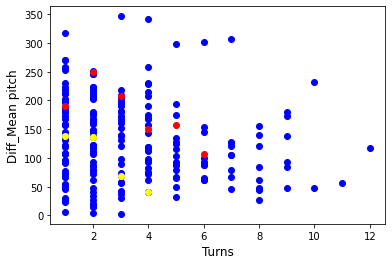

In [140]:
plt.scatter(xlabel,diff[:,6], color='blue')
plt.scatter(xlabel31,diffc31[:,6], color='red')
plt.scatter(xlabel22,diffc22[:,6], color='yellow')
plt.xlabel('Turns', fontsize=12)
plt.ylabel('Diff_Mean pitch',fontsize=12)


In [141]:
f0mean=np.c_[xlabel,-diff[:,6]]
f0meanp=pd.DataFrame(f0mean)
f0meanp.columns=['Turns','Diff_f0 mean']

In [142]:
f0range=np.c_[xlabel,-diff[:,3]]
f0rangep=pd.DataFrame(f0range)
f0meanp.columns=['Turns','Diff_f0 range']

In [143]:
f0max=np.c_[xlabel,-diff[:,4]]
f0maxp=pd.DataFrame(f0max)
f0maxp.columns=['Turns','Diff_f0 max']

In [144]:
f0min=np.c_[xlabel,-diff[:,5]]
f0minp=pd.DataFrame(f0min)
f0minp.columns=['Turns','Diff_f0 min']

In [145]:
print(np.mean(-diff[:,3]),np.mean(-diff[:,4]),np.mean(-diff[:,5]),np.mean(-diff[:,6]))

-107.79588973309279 -163.48646094711856 -109.3585491510227 -131.73516955587917


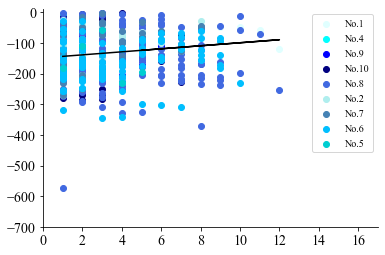

In [146]:
plt.rc('font',family='Times New Roman')
fig, ax=plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
p1=plt.scatter(xlabel1,-diffc1[:,6],color="lightcyan")
p2=plt.scatter(xlabel2,-diffc2[:,6],color="aqua")
p3=plt.scatter(xlabel3,-diffc3[:,6],color="blue")
p4=plt.scatter(xlabel4,-diffc4[:,6],color="navy")
p5=plt.scatter(xlabel5,-diffc5[:,6],color="royalblue")
p6=plt.scatter(xlabel6,-diffc6[:,6],color="paleturquoise")
p7=plt.scatter(xlabel7,-diffc7[:,6],color="steelblue")
p8=plt.scatter(xlabel8,-diffc8[:,6],color="deepskyblue")
p9=plt.scatter(xlabel9,-diffc9[:,6],color="darkturquoise")
plt.legend(handles=[p1,p2,p3,p4,p5,p6,p7,p8,p9],labels=['No.1','No.4','No.9','No.10','No.8','No.2','No.7','No.6','No.5'],loc='best')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0,17)
plt.ylim(-700,10)
linear_model=np.polyfit(xlabel,-diff[:,6],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(xlabel,linear_model_fn(xlabel),color="k")

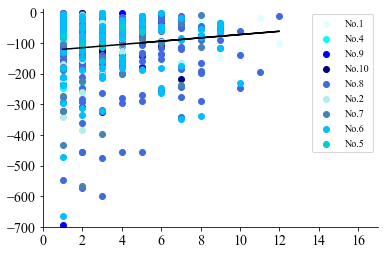

In [147]:
plt.rc('font',family='Times New Roman')
fig, ax=plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
p1=plt.scatter(xlabel1,-diffc1[:,3],color="lightcyan")
p2=plt.scatter(xlabel2,-diffc2[:,3],color="aqua")
p3=plt.scatter(xlabel3,-diffc3[:,3],color="blue")
p4=plt.scatter(xlabel4,-diffc4[:,3],color="navy")
p5=plt.scatter(xlabel5,-diffc5[:,3],color="royalblue")
p6=plt.scatter(xlabel6,-diffc6[:,3],color="paleturquoise")
p7=plt.scatter(xlabel7,-diffc7[:,3],color="steelblue")
p8=plt.scatter(xlabel8,-diffc8[:,3],color="deepskyblue")
p9=plt.scatter(xlabel9,-diffc9[:,3],color="darkturquoise")
plt.legend(handles=[p1,p2,p3,p4,p5,p6,p7,p8,p9],labels=['No.1','No.4','No.9','No.10','No.8','No.2','No.7','No.6','No.5'],loc='best')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0,17)
plt.ylim(-700,10)
linear_model=np.polyfit(xlabel,-diff[:,3],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(xlabel,linear_model_fn(xlabel),color="k")

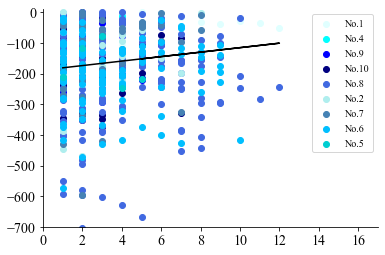

In [148]:
plt.rc('font',family='Times New Roman')
fig, ax=plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
p1=plt.scatter(xlabel1,-diffc1[:,4],color="lightcyan")
p2=plt.scatter(xlabel2,-diffc2[:,4],color="aqua")
p3=plt.scatter(xlabel3,-diffc3[:,4],color="blue")
p4=plt.scatter(xlabel4,-diffc4[:,4],color="navy")
p5=plt.scatter(xlabel5,-diffc5[:,4],color="royalblue")
p6=plt.scatter(xlabel6,-diffc6[:,4],color="paleturquoise")
p7=plt.scatter(xlabel7,-diffc7[:,4],color="steelblue")
p8=plt.scatter(xlabel8,-diffc8[:,4],color="deepskyblue")
p9=plt.scatter(xlabel9,-diffc9[:,4],color="darkturquoise")
plt.legend(handles=[p1,p2,p3,p4,p5,p6,p7,p8,p9],labels=['No.1','No.4','No.9','No.10','No.8','No.2','No.7','No.6','No.5'],loc='best')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0,17)
plt.ylim(-700,10)
linear_model=np.polyfit(xlabel,-diff[:,4],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(xlabel,linear_model_fn(xlabel),color="k")

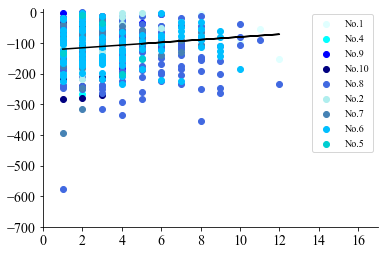

In [149]:
plt.rc('font',family='Times New Roman')
fig, ax=plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
p1=plt.scatter(xlabel1,-diffc1[:,5],color="lightcyan")
p2=plt.scatter(xlabel2,-diffc2[:,5],color="aqua")
p3=plt.scatter(xlabel3,-diffc3[:,5],color="blue")
p4=plt.scatter(xlabel4,-diffc4[:,5],color="navy")
p5=plt.scatter(xlabel5,-diffc5[:,5],color="royalblue")
p6=plt.scatter(xlabel6,-diffc6[:,5],color="paleturquoise")
p7=plt.scatter(xlabel7,-diffc7[:,5],color="steelblue")
p8=plt.scatter(xlabel8,-diffc8[:,5],color="deepskyblue")
p9=plt.scatter(xlabel9,-diffc9[:,5],color="darkturquoise")
plt.legend(handles=[p1,p2,p3,p4,p5,p6,p7,p8,p9],labels=['No.1','No.4','No.9','No.10','No.8','No.2','No.7','No.6','No.5'],loc='best')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0,17)
plt.ylim(-700,10)
linear_model=np.polyfit(xlabel,-diff[:,5],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(xlabel,linear_model_fn(xlabel),color="k")

In [150]:
#ax=sns.lmplot(x='Turns', y='Diff_f0 mean',data=f0meanp, sharex=False, sharey=False, line_kws={'color': 'red'})
#ax.set(xlim=(-1,15))
#ax.set(ylim=(-1, 600))

In [151]:
def turnc(filesturn,filesturnc):
    turn=np.zeros((1,2))
    aaa=0
    for i in range(len(filesturn)):
        starttime=re.search("(\d+\.\d+)",filesturn[i]).group(0)
        for j in range(len(filesturnc)):
            starttimec=re.search("(\d+\.\d+)",filesturnc[j]).group(0)
            if float(starttimec)>float(starttime):
                aaa=aaa+1
    timea=round(float(starttime))
    turn[0,0]=timea
    turn[0,1]=aaa
    return turn

In [152]:
turnc11=turnc(filesturn11,filesturn11c)
turnc12=turnc(filesturn12,filesturn12c)
turnc13=turnc(filesturn13,filesturn13c)
turnc14=turnc(filesturn14,filesturn14c)
turnc15=turnc(filesturn15,filesturn15c)

turnc1=np.vstack((turnc11,turnc12,turnc13,turnc14,turnc15))

In [153]:
mn11=len(filesturn11)*len(filesturn11c)
mn12=len(filesturn12)*len(filesturn12c)
mn13=len(filesturn13)*len(filesturn13c)
mn14=len(filesturn14)*len(filesturn14c)
mn15=len(filesturn15)*len(filesturn15c)

mn1=mn11+mn12+mn13+mn14+mn15

In [154]:
mn11=len(filesturn11c)
mn12=len(filesturn12c)
mn13=len(filesturn13c)
mn14=len(filesturn14c)
mn15=len(filesturn15c)

mn1=mn11+mn12+mn13+mn14+mn15

In [155]:
turnc21=turnc(filesturn21,filesturn21c)
turnc22=turnc(filesturn22,filesturn22c)
turnc23=turnc(filesturn23,filesturn23c)
turnc24=turnc(filesturn24,filesturn24c)
turnc25=turnc(filesturn25,filesturn25c)
turnc26=turnc(filesturn26,filesturn26c)

turnc2=np.vstack((turnc21,turnc22,turnc23,turnc24,turnc25,turnc26))

In [156]:
mn21=len(filesturn21)*len(filesturn21c)
mn22=len(filesturn22)*len(filesturn22c)
mn23=len(filesturn23)*len(filesturn23c)
mn24=len(filesturn24)*len(filesturn24c)
mn25=len(filesturn25)*len(filesturn25c)
mn26=len(filesturn26)*len(filesturn26c)

mn2=mn21+mn22+mn23+mn24+mn25+mn26

In [157]:
mn21=len(filesturn21c)
mn22=len(filesturn22c)
mn23=len(filesturn23c)
mn24=len(filesturn24c)
mn25=len(filesturn25c)
mn26=len(filesturn26c)

mn2=mn21+mn22+mn23+mn24+mn25+mn26

In [158]:
turnc31=turnc(filesturn31,filesturn31c)
turnc32=turnc(filesturn32,filesturn32c)
turnc33=turnc(filesturn33,filesturn33c)
turnc34=turnc(filesturn34,filesturn34c)
turnc35=turnc(filesturn35,filesturn35c)
turnc36=turnc(filesturn36,filesturn36c)
turnc37=turnc(filesturn37,filesturn37c)
turnc38=turnc(filesturn38,filesturn38c)
turnc39=turnc(filesturn39,filesturn39c)
turnc310=turnc(filesturn310,filesturn310c)

turnc3=np.vstack((turnc31,turnc33,turnc34,turnc35,turnc36,turnc37,turnc38,turnc39,turnc310))

In [159]:
mn31=len(filesturn31)*len(filesturn31c)
mn32=len(filesturn32)*len(filesturn32c)
mn33=len(filesturn33)*len(filesturn33c)
mn34=len(filesturn34)*len(filesturn34c)
mn35=len(filesturn35)*len(filesturn35c)
mn36=len(filesturn36)*len(filesturn36c)
mn37=len(filesturn37)*len(filesturn37c)
mn38=len(filesturn38)*len(filesturn38c)
mn39=len(filesturn39)*len(filesturn39c)
mn310=len(filesturn310)*len(filesturn310c)

mn3=mn31+mn33+mn34+mn35+mn36+mn37+mn38+mn39+mn310

In [160]:
mn31=len(filesturn31c)
mn32=len(filesturn32c)
mn33=len(filesturn33c)
mn34=len(filesturn34c)
mn35=len(filesturn35c)
mn36=len(filesturn36c)
mn37=len(filesturn37c)
mn38=len(filesturn38c)
mn39=len(filesturn39c)
mn310=len(filesturn310c)

mn3=mn31+mn33+mn34+mn35+mn36+mn37+mn38+mn39+mn310

In [161]:
turnc41=turnc(filesturn41,filesturn41c)
turnc42=turnc(filesturn42,filesturn42c)
turnc43=turnc(filesturn43,filesturn43c)
turnc44=turnc(filesturn44,filesturn44c)
turnc45=turnc(filesturn45,filesturn45c)
turnc46=turnc(filesturn46,filesturn46c)
turnc47=turnc(filesturn47,filesturn47c)
turnc48=turnc(filesturn48,filesturn48c)
turnc49=turnc(filesturn49,filesturn49c)
turnc410=turnc(filesturn410,filesturn410c)
turnc411=turnc(filesturn411,filesturn411c)
turnc412=turnc(filesturn412,filesturn412c)
turnc413=turnc(filesturn413,filesturn413c)
turnc414=turnc(filesturn414,filesturn414c)
turnc4=np.vstack((turnc41,turnc42,turnc43,turnc44,turnc45,turnc46,turnc47,turnc48,turnc49,turnc410,turnc411,turnc412,turnc413,turnc414))

In [162]:
mn41=len(filesturn41)*len(filesturn41c)
mn42=len(filesturn42)*len(filesturn42c)
mn43=len(filesturn43)*len(filesturn43c)
mn44=len(filesturn44)*len(filesturn44c)
mn45=len(filesturn45)*len(filesturn45c)
mn46=len(filesturn46)*len(filesturn46c)
mn47=len(filesturn47)*len(filesturn47c)
mn48=len(filesturn48)*len(filesturn48c)
mn49=len(filesturn49)*len(filesturn49c)
mn410=len(filesturn410)*len(filesturn410c)
mn411=len(filesturn411)*len(filesturn411c)
mn412=len(filesturn412)*len(filesturn412c)
mn413=len(filesturn413)*len(filesturn413c)
mn414=len(filesturn414)*len(filesturn414c)

mn4=mn41+mn42+mn43+mn44+mn45+mn46+mn47+mn48+mn49+mn410+mn411+mn412+mn413+mn414

In [163]:
turnc51=turnc(filesturn51,filesturn51c)
turnc52=turnc(filesturn52,filesturn52c)
turnc53=turnc(filesturn53,filesturn53c)
turnc54=turnc(filesturn54,filesturn54c)
turnc55=turnc(filesturn55,filesturn55c)
turnc56=turnc(filesturn56,filesturn56c)
turnc57=turnc(filesturn57,filesturn57c)
turnc58=turnc(filesturn58,filesturn58c)
turnc59=turnc(filesturn59,filesturn59c)
turnc510=turnc(filesturn510,filesturn510c)

turnc5t1=np.vstack((turnc51,turnc52,turnc53,turnc54,turnc55,turnc56,turnc57,turnc58,turnc59,turnc510))

In [164]:
turnc511=turnc(filesturn511,filesturn511c)
turnc512=turnc(filesturn512,filesturn512c)
turnc513=turnc(filesturn513,filesturn513c)
turnc514=turnc(filesturn514,filesturn514c)
turnc515=turnc(filesturn515,filesturn515c)
turnc516=turnc(filesturn516,filesturn516c)
turnc517=turnc(filesturn517,filesturn517c)
turnc518=turnc(filesturn518,filesturn518c)
turnc519=turnc(filesturn519,filesturn519c)
turnc520=turnc(filesturn520,filesturn520c)

turnc5t2=np.vstack((turnc511,turnc512,turnc513,turnc514,turnc515,turnc516,turnc517,turnc518,turnc519,turnc520))

In [165]:
turnc521=turnc(filesturn521,filesturn521c)
turnc522=turnc(filesturn522,filesturn522c)
turnc523=turnc(filesturn523,filesturn523c)
turnc524=turnc(filesturn524,filesturn524c)
turnc525=turnc(filesturn525,filesturn525c)
turnc526=turnc(filesturn526,filesturn526c)
turnc527=turnc(filesturn527,filesturn527c)
turnc528=turnc(filesturn528,filesturn528c)
turnc529=turnc(filesturn529,filesturn529c)
turnc530=turnc(filesturn530,filesturn530c)

turnc5t3=np.vstack((turnc521,turnc522,turnc523,turnc524,turnc525,turnc526,turnc527,turnc528,turnc529,turnc530))

In [166]:
turnc531=turnc(filesturn531,filesturn531c)
turnc532=turnc(filesturn532,filesturn532c)
turnc533=turnc(filesturn533,filesturn533c)
turnc534=turnc(filesturn534,filesturn534c)
turnc535=turnc(filesturn535,filesturn535c)
turnc536=turnc(filesturn536,filesturn536c)
turnc537=turnc(filesturn537,filesturn537c)
turnc538=turnc(filesturn538,filesturn538c)
turnc539=turnc(filesturn539,filesturn539c)
turnc540=turnc(filesturn540,filesturn540c)

turnc5t4=np.vstack((turnc531,turnc532,turnc533,turnc534,turnc535,turnc536,turnc537,turnc538,turnc539,turnc540))

In [167]:
turnc5=np.vstack((turnc5t1,turnc5t2,turnc5t3,turnc5t4))

In [168]:
mn51=len(filesturn51)*len(filesturn51c)
mn52=len(filesturn52)*len(filesturn52c)
mn53=len(filesturn53)*len(filesturn53c)
mn54=len(filesturn54)*len(filesturn54c)
mn55=len(filesturn55)*len(filesturn55c)
mn56=len(filesturn56)*len(filesturn56c)
mn57=len(filesturn57)*len(filesturn57c)
mn58=len(filesturn58)*len(filesturn58c)
mn59=len(filesturn59)*len(filesturn59c)
mn510=len(filesturn510)*len(filesturn510c)

mn511=len(filesturn511)*len(filesturn511c)
mn512=len(filesturn512)*len(filesturn512c)
mn513=len(filesturn513)*len(filesturn513c)
mn514=len(filesturn514)*len(filesturn514c)
mn515=len(filesturn515)*len(filesturn515c)
mn516=len(filesturn516)*len(filesturn516c)
mn517=len(filesturn517)*len(filesturn517c)
mn518=len(filesturn518)*len(filesturn518c)
mn519=len(filesturn519)*len(filesturn519c)
mn520=len(filesturn520)*len(filesturn520c)

mn521=len(filesturn521)*len(filesturn521c)
mn522=len(filesturn522)*len(filesturn522c)
mn523=len(filesturn523)*len(filesturn523c)
mn524=len(filesturn524)*len(filesturn524c)
mn525=len(filesturn525)*len(filesturn525c)
mn526=len(filesturn526)*len(filesturn526c)
mn527=len(filesturn527)*len(filesturn527c)
mn528=len(filesturn528)*len(filesturn528c)
mn529=len(filesturn529)*len(filesturn529c)
mn530=len(filesturn530)*len(filesturn530c)

mn531=len(filesturn531)*len(filesturn531c)
mn532=len(filesturn532)*len(filesturn532c)
mn533=len(filesturn533)*len(filesturn533c)
mn534=len(filesturn534)*len(filesturn534c)
mn535=len(filesturn535)*len(filesturn535c)
mn536=len(filesturn536)*len(filesturn536c)
mn537=len(filesturn537)*len(filesturn537c)
mn538=len(filesturn538)*len(filesturn538c)
mn539=len(filesturn539)*len(filesturn539c)
mn540=len(filesturn540)*len(filesturn540c)

mn5t1=mn51+mn52+mn54+mn55+mn56+mn57+mn58+mn59+mn510+mn511+mn512+mn513+mn514+mn515+mn516+mn517+mn518+mn519+mn520
mn5t2=mn521+mn522+mn523+mn524+mn525+mn526+mn527+mn528+mn529+mn530+mn531+mn532+mn534+mn535+mn536+mn537+mn538+mn539+mn540
mn5=mn5t1+mn5t2

In [169]:
turnc61=turnc(filesturn61,filesturn61c)
turnc62=turnc(filesturn62,filesturn62c)
turnc63=turnc(filesturn63,filesturn63c)
turnc64=turnc(filesturn64,filesturn64c)
turnc65=turnc(filesturn65,filesturn65c)
turnc66=turnc(filesturn66,filesturn66c)
turnc67=turnc(filesturn67,filesturn67c)
turnc68=turnc(filesturn68,filesturn68c)

turnc6=np.vstack((turnc61,turnc62,turnc63,turnc64,turnc65,turnc66,turnc67,turnc68))

In [170]:
mn61=len(filesturn61)*len(filesturn61c)
mn62=len(filesturn62)*len(filesturn62c)
mn63=len(filesturn63)*len(filesturn63c)
mn64=len(filesturn64)*len(filesturn64c)
mn65=len(filesturn65)*len(filesturn65c)
mn66=len(filesturn66)*len(filesturn66c)
mn67=len(filesturn67)*len(filesturn67c)
mn68=len(filesturn68)*len(filesturn68c)

mn6=mn61+mn62+mn63+mn64+mn65+mn66+mn67+mn68

In [171]:
turnc71=turnc(filesturn71,filesturn71c)
turnc72=turnc(filesturn72,filesturn72c)
turnc73=turnc(filesturn73,filesturn73c)
turnc74=turnc(filesturn74,filesturn74c)
turnc75=turnc(filesturn75,filesturn75c)
turnc76=turnc(filesturn76,filesturn76c)
turnc77=turnc(filesturn77,filesturn77c)
turnc78=turnc(filesturn78,filesturn78c)
turnc79=turnc(filesturn79,filesturn79c)
turnc710=turnc(filesturn710,filesturn710c)
turnc711=turnc(filesturn711,filesturn711c)

turnc7=np.vstack((turnc71,turnc72,turnc73,turnc74,turnc75,turnc76,turnc77,turnc78,turnc79,turnc710,turnc711))

In [172]:
mn71=len(filesturn71)*len(filesturn71c)
mn72=len(filesturn72)*len(filesturn72c)
mn73=len(filesturn73)*len(filesturn73c)
mn74=len(filesturn74)*len(filesturn74c)
mn75=len(filesturn75)*len(filesturn75c)
mn76=len(filesturn76)*len(filesturn76c)
mn77=len(filesturn77)*len(filesturn77c)
mn78=len(filesturn78)*len(filesturn78c)
mn79=len(filesturn79)*len(filesturn79c)
mn710=len(filesturn710)*len(filesturn710c)
mn711=len(filesturn711)*len(filesturn711c)

mn7=mn71+mn72+mn73+mn74+mn75+mn76+mn77+mn78+mn79+mn710+mn711

In [173]:
turnc81=turnc(filesturn81,filesturn81c)
turnc82=turnc(filesturn82,filesturn82c)
turnc83=turnc(filesturn83,filesturn83c)
turnc84=turnc(filesturn84,filesturn84c)
turnc85=turnc(filesturn85,filesturn85c)
turnc86=turnc(filesturn86,filesturn86c)
turnc87=turnc(filesturn87,filesturn87c)
turnc88=turnc(filesturn88,filesturn88c)
turnc89=turnc(filesturn89,filesturn89c)
turnc810=turnc(filesturn810,filesturn810c)
turnc811=turnc(filesturn811,filesturn811c)

turnc8t1=np.vstack((turnc81,turnc82,turnc83,turnc84,turnc85,turnc86,turnc87,turnc88,turnc89,turnc810,turnc811))

In [174]:

turnc812=turnc(filesturn812,filesturn812c)
turnc813=turnc(filesturn813,filesturn813c)
turnc814=turnc(filesturn814,filesturn814c)
turnc815=turnc(filesturn815,filesturn815c)
turnc816=turnc(filesturn816,filesturn816c)
turnc817=turnc(filesturn817,filesturn817c)
turnc818=turnc(filesturn818,filesturn818c)
turnc819=turnc(filesturn819,filesturn819c)
turnc820=turnc(filesturn820,filesturn820c)
turnc821=turnc(filesturn821,filesturn821c)
turnc822=turnc(filesturn822,filesturn822c)

turnc8t2=np.vstack((turnc812,turnc813,turnc814,turnc815,turnc816,turnc817,turnc818,turnc819,turnc820,turnc821,turnc822))

In [175]:
mn81=len(filesturn81)*len(filesturn81c)
mn82=len(filesturn82)*len(filesturn82c)
mn83=len(filesturn83)*len(filesturn83c)
mn84=len(filesturn84)*len(filesturn84c)
mn85=len(filesturn85)*len(filesturn85c)
mn86=len(filesturn86)*len(filesturn86c)
mn87=len(filesturn87)*len(filesturn87c)
mn88=len(filesturn88)*len(filesturn88c)
mn89=len(filesturn89)*len(filesturn89c)
mn810=len(filesturn810)*len(filesturn810c)

mn811=len(filesturn811)*len(filesturn811c)
mn812=len(filesturn812)*len(filesturn812c)
mn813=len(filesturn813)*len(filesturn813c)
mn814=len(filesturn814)*len(filesturn814c)
mn815=len(filesturn815)*len(filesturn815c)
mn816=len(filesturn816)*len(filesturn816c)
mn817=len(filesturn817)*len(filesturn817c)
mn818=len(filesturn818)*len(filesturn818c)
mn819=len(filesturn819)*len(filesturn819c)
mn820=len(filesturn820)*len(filesturn820c)

mn821=len(filesturn821)*len(filesturn821c)
mn822=len(filesturn822)*len(filesturn822c)

mn8=mn81+mn82+mn83+mn84+mn85+mn86+mn87+mn88+mn89+mn810+mn811+mn812+mn813+mn814+mn815+mn816+mn817+mn818+mn819+mn820+mn821+mn822

In [176]:
turnc8=np.vstack((turnc8t1,turnc8t2))

In [177]:
turnc9=turnc(filesturn91,filesturn91c)

In [178]:
mn9=len(filesturn91)*len(filesturn91c)

In [179]:
#xx=np.r_[turnc1[:,0],turnc2[:,0],turnc3[:,0],turnc4[:,0],turnc5[:,0],turnc6[:,0],turnc7[:,0],turnc8[:,0],turnc9[:,0]]
#yy=np.r_[turnc1[:,1]/171,turnc2[:,1]/202,turnc3[:,1]/396,turnc4[:,1]/173,turnc5[:,1]/565,turnc6[:,1]/423,turnc7[:,1]/204,turnc8[:,1]/479,turnc9[:,1]/264]
#dtwall=np.c_[xx,yy]
#dtwallp=pd.DataFrame(dtwall)
#dtwallp.columns=['Time','Turndots']

In [180]:
xx=np.r_[turnc1[:,0],turnc2[:,0],turnc6[:,0],turnc7[:,0],turnc8[:,0],turnc9[:,0]]
yy=np.r_[turnc1[:,1]/171,turnc2[:,1]/202,turnc6[:,1]/423,turnc7[:,1]/204,turnc8[:,1]/479,turnc9[:,1]/264]
dtwall=np.c_[xx,yy]
dtwallp=pd.DataFrame(dtwall)
dtwallp.columns=['Time','Turndots']

In [181]:
#xx=np.r_[turnc1[:,0],turnc2[:,0],turnc3[:,0],turnc4[:,0],turnc5[:,0],turnc6[:,0],turnc7[:,0],turnc8[:,0],turnc9[:,0]]
#yy=np.r_[turnc1[:,1],turnc2[:,1],turnc3[:,1],turnc4[:,1],turnc5[:,1],turnc6[:,1],turnc7[:,1],turnc8[:,1],turnc9[:,1]]
#dtwall=np.c_[xx,yy]
#dtwallp=pd.DataFrame(dtwall)
#dtwallp.columns=['Time','Turndots']

In [182]:
xx=np.r_[turnc1[:,0],turnc2[:,0],turnc6[:,0],turnc7[:,0],turnc8[:,0],turnc9[:,0]]
yy=np.r_[turnc1[:,1],turnc2[:,1],turnc6[:,1],turnc7[:,1],turnc8[:,1],turnc9[:,1]]
dtwall=np.c_[xx,yy]
dtwallp=pd.DataFrame(dtwall)
dtwallp.columns=['Time','Turndots']

In [183]:
print('cofft of day=',stats.pearsonr(xx,yy))

cofft of day= PearsonRResult(statistic=0.013609772825173576, pvalue=0.9229467998409374)


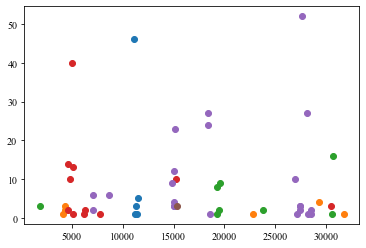

In [184]:
plt.scatter(turnc1[:,0],turnc1[:,1])
plt.scatter(turnc2[:,0],turnc2[:,1])
#plt.scatter(turnc3[:,0],turnc3[:,1])
#plt.scatter(turnc4[:,0],turnc4[:,1])
#plt.scatter(turnc5[:,0],turnc5[:,1])
plt.scatter(turnc6[:,0],turnc6[:,1])
plt.scatter(turnc7[:,0],turnc7[:,1])
plt.scatter(turnc8[:,0],turnc8[:,1])
plt.scatter(turnc9[:,0],turnc9[:,1])

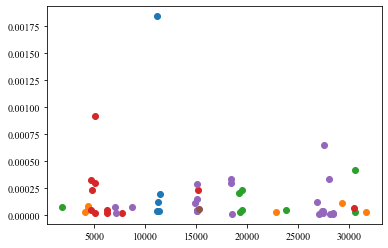

In [185]:
plt.scatter(turnc1[:,0],turnc1[:,1]/24966)
plt.scatter(turnc2[:,0],turnc2[:,1]/36360)
#plt.scatter(turnc3[:,0],turnc3[:,1]/47916)
#plt.scatter(turnc4[:,0],turnc4[:,1]/25950)
#plt.scatter(turnc5[:,0],turnc5[:,1]/171760)
plt.scatter(turnc6[:,0],turnc6[:,1]/38493)
plt.scatter(turnc7[:,0],turnc7[:,1]/43452)
plt.scatter(turnc8[:,0],turnc8[:,1]/79993)
plt.scatter(turnc9[:,0],turnc9[:,1]/53592)

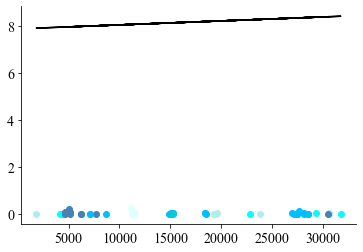

In [186]:
plt.rc('font',family='Times New Roman')
fig, ax=plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.scatter(turnc1[:,0],turnc1[:,1]/171,color="lightcyan")
plt.scatter(turnc2[:,0],turnc2[:,1]/202,color="aqua")
#plt.scatter(turnc3[:,0],turnc3[:,1]/396,color="blue")
#plt.scatter(turnc4[:,0],turnc4[:,1]/173,color="navy")
#plt.scatter(turnc5[:,0],turnc5[:,1]/565,color="royalblue")
plt.scatter(turnc6[:,0],turnc6[:,1]/423,color="paleturquoise")
plt.scatter(turnc7[:,0],turnc7[:,1]/204,color="steelblue")
plt.scatter(turnc8[:,0],turnc8[:,1]/479,color="deepskyblue")
plt.scatter(turnc9[:,0],turnc9[:,1]/264,color="darkturquoise")
#plt.legend(handles=[p1,p2,p3,p4,p5,p6,p7,p8,p9],labels=['No.1','No.4','No.9','No.10','No.8','No.2','No.7','No.6','No.5'],loc='best')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
linear_model=np.polyfit(xx,yy,1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(xx,linear_model_fn(xx),color="k")

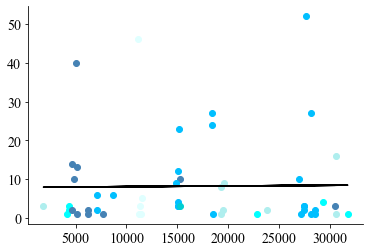

In [187]:
plt.rc('font',family='Times New Roman')
fig, ax=plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
p1=plt.scatter(turnc1[:,0],turnc1[:,1],color="lightcyan")
p2=plt.scatter(turnc2[:,0],turnc2[:,1],color="aqua")
#p3=plt.scatter(turnc3[:,0],turnc3[:,1],color="blue")
#p4=plt.scatter(turnc4[:,0],turnc4[:,1],color="navy")
#p5=plt.scatter(turnc5[:,0],turnc5[:,1],color="royalblue")
p6=plt.scatter(turnc6[:,0],turnc6[:,1],color="paleturquoise")
p7=plt.scatter(turnc7[:,0],turnc7[:,1],color="steelblue")
p8=plt.scatter(turnc8[:,0],turnc8[:,1],color="deepskyblue")
p9=plt.scatter(turnc9[:,0],turnc9[:,1],color="darkturquoise")
#plt.legend(handles=[p1,p2,p3,p4,p5,p6,p7,p8,p9],labels=['No.1','No.4','No.9','No.10','No.8','No.2','No.7','No.6','No.5'],loc='best')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
linear_model=np.polyfit(xx,yy,1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(xx,linear_model_fn(xx),color="k")

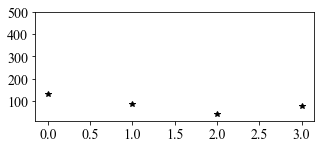

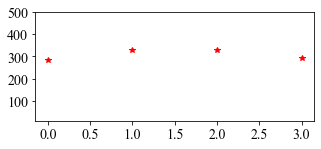

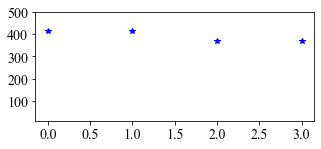

In [188]:

plt.rc('font',family='Times New Roman')
plt.figure(figsize=(5,2)) 
plt.plot(diffc65[:,6],'*',color='black')
plt.ylim(10,500)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.figure(figsize=(5,2)) 
plt.plot(t65[:,6],'*',color='red')
plt.ylim(10,500)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.figure(figsize=(5,2)) 
plt.plot(tc65[:,6],'*',color='blue')
plt.ylim(10,500)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()